Původní verze sešit pru hledání parametrů, kterými by šlo filtrovat beletrii aj. Ponechávám část s explorací, na finální filtrování jsem nakonec šel jinak, viz příslušný sešit (číslo neuvádím, neboť se asi ještě bude měnit).

***

Zde hledáme kódy MDT, kterými by šlo vyfiltrovat specifické druhy knih (česká beletrie apod.).

Vyzobáno z M. Balíková: [Konkordance Konspektového schématu a dvou verzí Vybraných znaků MDT (verzí z roku 1993 a 2002)](https://text.nkp.cz/o-knihovne/odborne-cinnosti/zpracovani-fondu/vecne-zpracovani-vecne-autority/konkordance-konspektoveho-schematu-a-dvou-verzi-vybranych-znaku-mdt):

- 82-1 = Poezie. Básně. Verš- 82-2 = Dramata. Divadelní hry
- 82-3 = Beletrie. Próza
- 82-31 = Romány
- 82-32 = Povídky
- 82-34 = Báje. Legendy. Pověsti. Pohádky
- 82-7 = Satirická próza. Humor, epigramy, parodie
- 821.162.3 = Česká literatura- 885.0 = Česká literatura.

**TODO: Kvůli opakovaným vydáním Erbena, Máchy, Němcové atd. nutno pracovat i s materiály z 19. století, protože jinak se tyto pravěkké věci ukazují jako žhavé novinky roku 1933 apod.** Alternativa: filtrovat to přes autority a +- vymazat mrtvé autorstvo.

In [9]:
import os
import re
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [ ]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [45]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'q', 'c','u', 'r']:
        if ('x' not in nn8[7:11]) and ('u' not in nn8[7:11]):
            return int(nn8[7:11])
        else:
            return None
    else:
        print(nn8)
        return None

In [46]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [47]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

<Axes: xlabel='rok'>

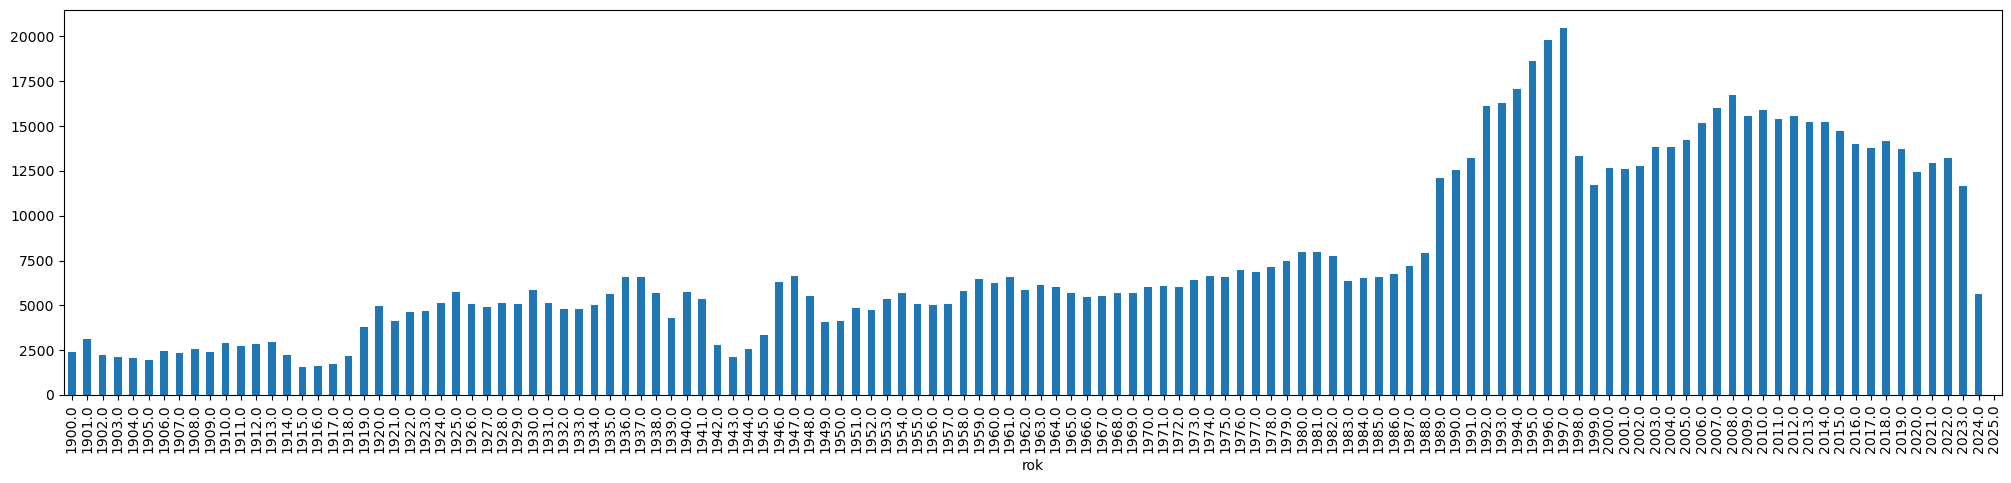

In [48]:
df.groupby("rok").size().plot.bar(figsize=(25,5))

In [192]:
df.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19970206737,970528s1997 xr e 000 0 cze,[80-85806-44-4],None,[(brož.)],None,None,None,None,[57],[Obecná biologie],"[57.081.1, (072)]",[aut],[ola2002158008],"[Jurčák, Jaroslav,]",[1946-],None,[Přírodověda :],[[Jaroslav Jurčák]],None,None,None,None,None,[Olomouc :],"[Prodos,]",[1997],None,None,None,None,None,None,None,[23 s. ;],None,[26 cm],None,None,[Marginálie],None,None,None,None,None,[přírodověda],None,None,None,None,None,[metodické příručky],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1997.0,Přírodověda
bk195801380,980228s1958 xr 000 1 cze,None,None,[(Váz.)],[cze],[fre],[1],None,None,None,None,[aut],[jn19990002312],"[Flaubert, Gustave,]",[1821-1880],None,[Prosté srdce /],[Gustave Flaubert ; ... přeložila Vendulka Tům...,None,None,None,[1. vyd.],None,[Praha :],"[Československý spisovatel,]",[1958],None,[(MF)],None,None,None,None,None,[63 s. ;],None,[8°],[Edice ilustrovaných novel ;],[sv. 27],[Přeloženo ze francouzského originálu Un coeur...,"[Příběh prosté venkovské ženy-služky, která sr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Edice ilustrovaných novel],None,[Ženy venkovské - povídky],nam a22 1a 4500,1958.0,Prosté srdce
cpk19950114788,960516s1995 xr ac e 000 macze,[80-85957-00-0],"[Kč 129,00]",[(váz.) :],[cze],[eng],[1],None,[358],[Vojenské letectvo. Dělostřelectvo. Ženijní je...,"[358.4-051, 94(519)""1950/1953"", 94(100)""1939/1...",[aut],[jn20000700577],"[Gabreski, Francis,]",[1919-2002],None,"[Gabby, život stíhače /]","[Francis Gabreski, C. Molesworth ; [překlad Ha...",None,None,None,[1. vyd.],None,[Ostrava :],"[REVI,]",[1995],None,None,None,None,None,None,None,[172 s. :],"[il., portréty (některé barev.) ;]",[24 cm],None,None,"[Předmluva James H. Doolittle, Přeloženo z ang...",None,None,None,None,None,"[druhá světová válka (1939-1945), vojenští let...",None,None,"[Spojené státy americké, Spojené státy americk...",None,None,[autobiografické vzpomínky],"[ill, ill, aut, trl, trl, aui]","[None, jn20010309692, None, xx0160814, xx01746...","[Novotný, Martin, Válka, Zbyněk,, Molesworth, ...","[None, 1960-, None, None, None, 1896-1993]",None,None,None,None,None,None,None,nam a22 a 4500,1995.0,"Gabby, život stíhače"
nos190116892,000124s1902 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],None,"[Chodský, J. St.]",None,None,[Karel IV. a jeho doba /],[J. St. Chodský],None,None,None,None,None,[Praha :],"[F. Šimáček,]",[1902],None,None,None,None,None,None,None,[47 s. :],[il.. ;],[8°],[Dalekohled ;],[sv. 4],[Se 36 vyobr. a s 2 příl.],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Dalekohled],None,None,nam a22 1 4500,1902.0,Karel IV. a jeho doba
ck8505621,851210s1985 xr u0|0 cze,None,"[3,50 Kčs]",[(Brož.) :],None,None,None,None,None,None,[802.0-07],None,None,None,None,None,[Anglické konverzační texty pro nefilologické ...,[Bořivoj Herzlík ... [aj.]],None,None,None,[2. [dotisk] 1. [vyd.]],None,[Praha :],"[SPN,]",[1985],[(Kyjov :],[MTZ 34)],None,None,None,None,None,"[I, 44 s. ;]",None,[29 cm],None,None,"[Přehl. lit., Rozmn., 500 výt., Vydavatel: Uni...",None,None,None,None,None,None,None,None,None,None,None,[učebnice vysokých škol],[aut],[jx20071210027],"[Herzlík, Bořivoj]",None,None,[kn20010709352],[Univerzita J.E. Purkyně v Brně],None,None,None,[angličtina - konverzace - texty - učebnice vy...,nam a22 4500,1985.0,Anglické konverzační texty pro nefilologické o...
nos190119290,000204s1911 xr e 000 p cze,None,None,None,None,None,

<Axes: xlabel='rok'>

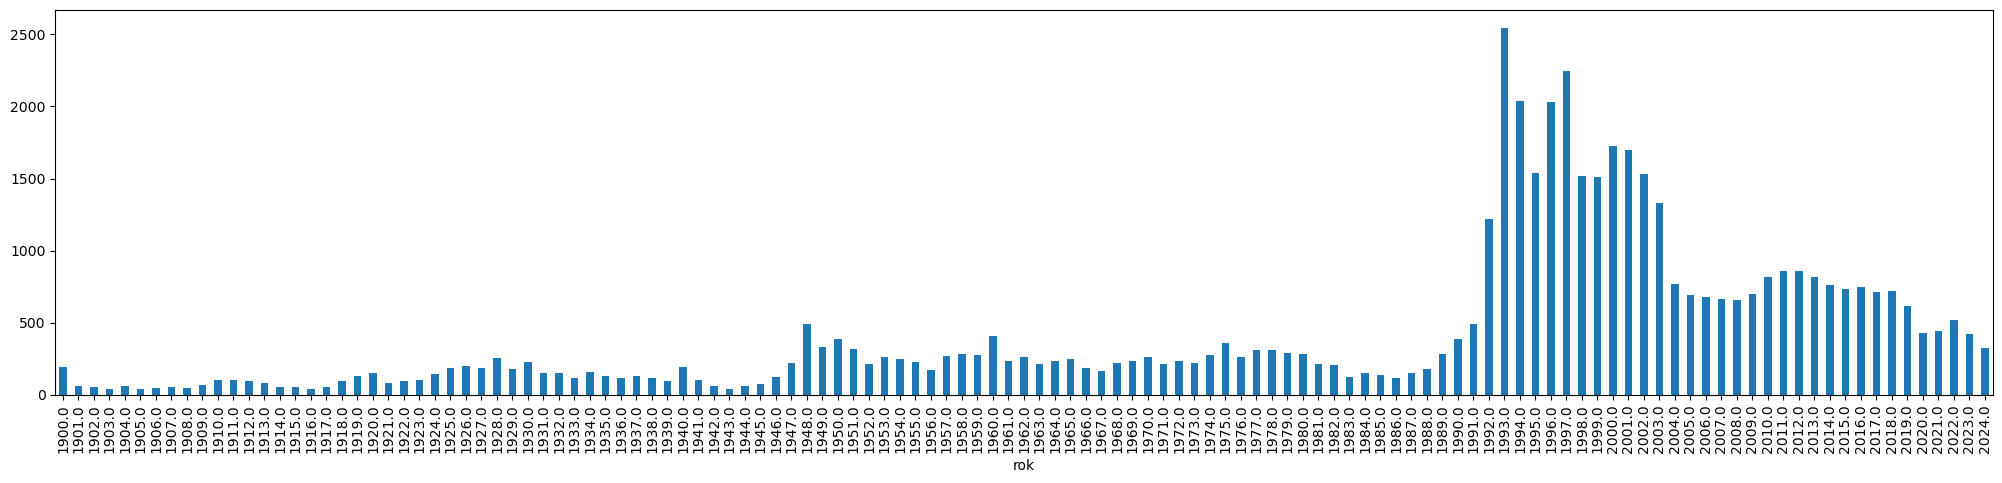

In [50]:
r(df[df['008'].str[33] == '1'])

In [51]:
df[df['008'].str[33] == 'f'][['100_a','245_a','rok']].sample(50)

,100_a,245_a,rok
001,,,
ck8400890,"[Merle, Robert,]",[V rozpuku mládí /],1984.0
nkc20122427011,"[Maruna, Jan,]",[Ema a kus nebe /],2012.0
bknaus02741,"[Kopta, Josef,]",[Jediné východisko :],1930.0
nkc20071784354,"[Struhar, Stanislav,]",[Hledání štěstí /],2007.0
nkc20182982774,"[Aubray, Camille]",[Vařila jsem pro Picassa /],2018.0
nos190135980,"[Pittnerová, Vlasta,]","[Andulko, mé dítě... :]",1912.0
nkc20203166509,"[Rahman, Yasmin]",[Co jsme si nikdy neřekli /],2020.0
cpk19990700219,"[Klostermann, Karel,]",[Ze světa lesních samot /],1999.0
nkc20081745359,"[Poniatowska, Elena,]","[Drahý Diego, objímá Tě Quiela /]",2007.0


<Axes: xlabel='rok'>

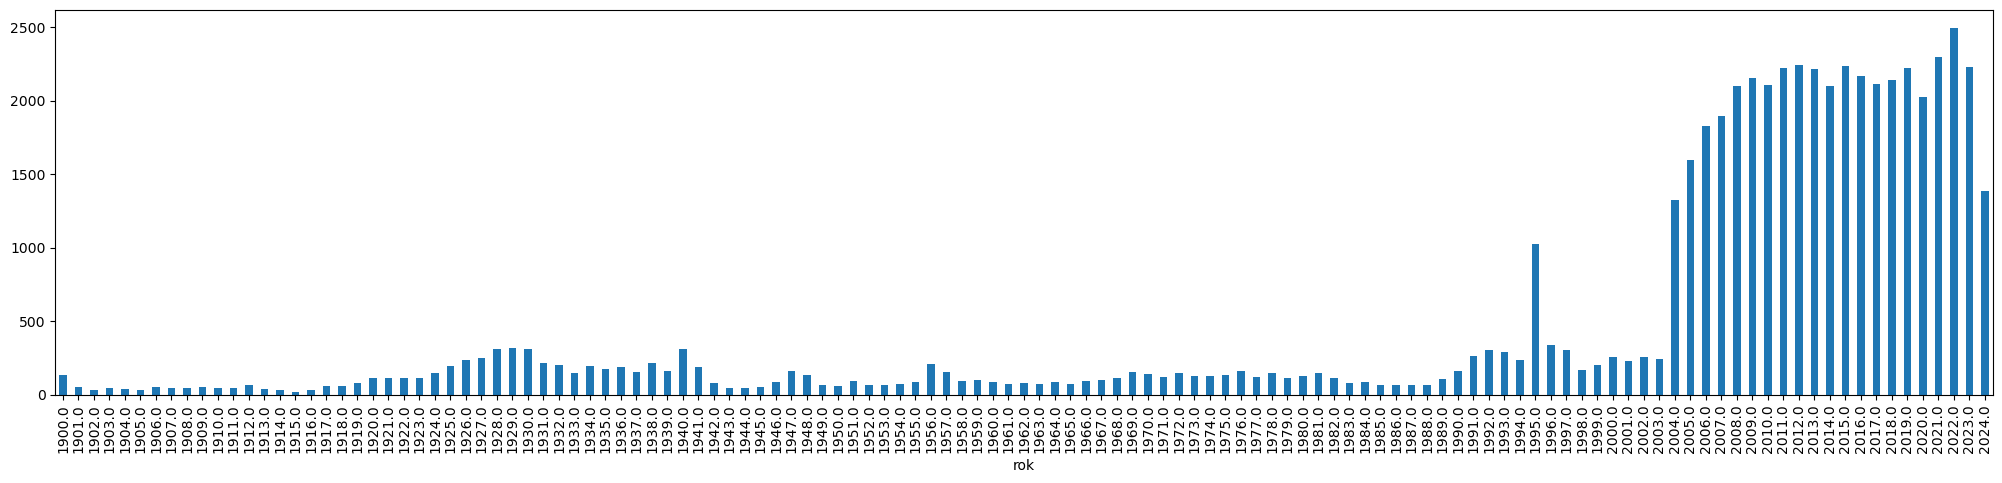

In [52]:
r(df[df['008'].str[33] == 'f'])

In [53]:
df = df.dropna(subset=["245_a"])
df['titul'] = df['245_a'].apply(lambda x: x[0][:-2].strip())

In [54]:
df['titul'].sample(10)

001
nkc20112172450    Multikulturalita a výchova k občanství ve stře...
nos190237875                                Spoření a život rodinný
nkc20152752962                    Rozhovory z Krkonoš a Podkrkonoší
bk193102025                                           Ohnivá křídla
bk197401326                                    Zemědělská ekonomika
nos190122644                                       Čarovná píšťalka
nkc20162859369                                        Před komiksem
nkc20081745475              Český a východoevropský neofolklorismus
np9544115                  Obyvatelstvo Rokycan v 16. - 18. století
cpk19990663089        Výpočetní metody obnovy dopravních prostředků
Name: titul, dtype: object

<Axes: xlabel='rok'>

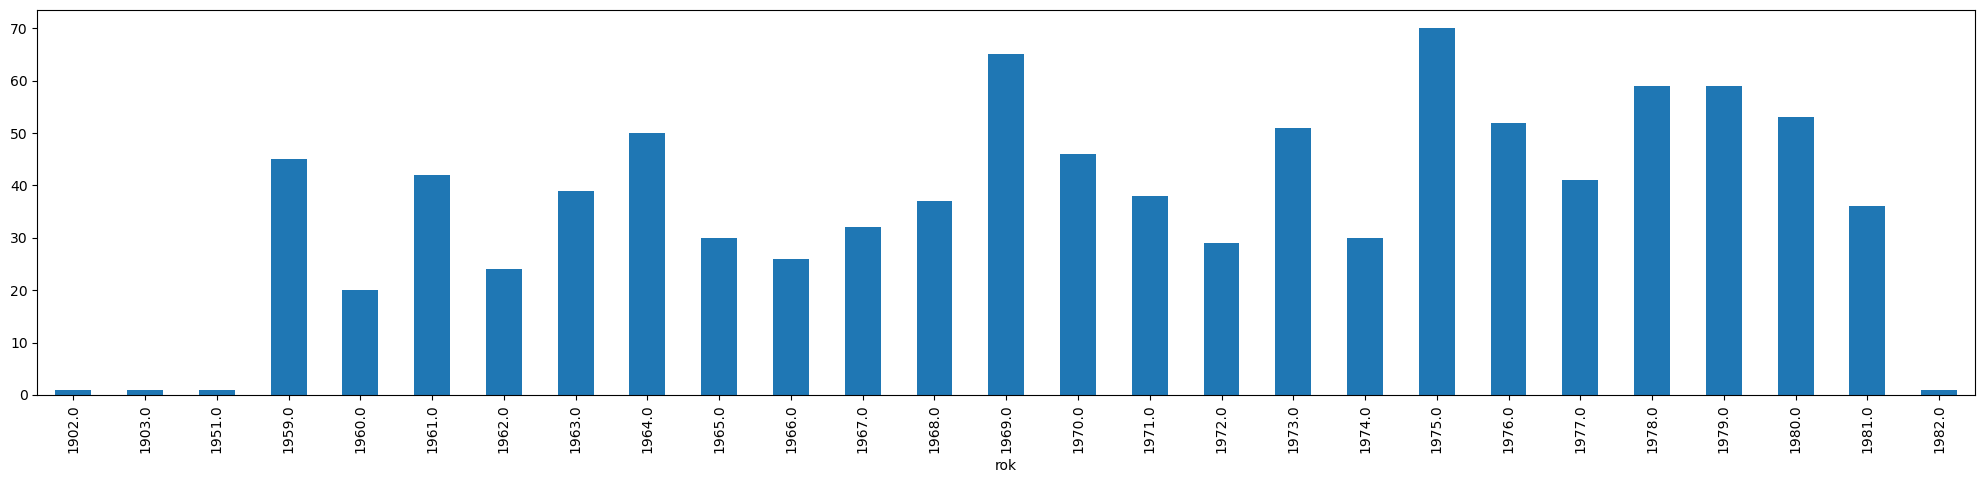

In [55]:
df[df['080_a'].astype(str).str.contains('885-321')].sort_values(by="rok").groupby("rok").size().plot.bar(figsize=(25,5))

In [56]:
df.sample(50)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk197705855,970828s1977 xr ||| | cze,None,None,None,[cze],[ukr],[1],None,None,None,"[883-1-821+92 Tyčyna, P.]",[aut],[jn20000605371],"[Tyčyna, Pavlo,]",[1891-1967],None,[Sluneční klarinety :],[Pavlo Tyčyna ; Verše z ukr. originálů s Orest...,None,None,None,[1. vyd.],None,[Praha :],"[Melantrich,]",[1977],[(Brno :],[Tisk 2)],None,None,None,None,None,"[107, [3] s. ;]",None,[8°],[Poesie ;],[Sv. 91],"[Vyd. k 60. výročí VŘSR, Přebal a vazba: Milan...",[Verše jednoho z předních představitelů ukraji...,None,None,None,None,None,None,None,None,None,None,None,[com],[jk01022023],"[Daněk, Václav,]",[1929-],None,None,None,None,[Poesie (Melantrich)],None,"[Tyčyna, Pavlo (1891-1967 básník ukraj.) - živ...",nam a22 1 4500,1977.0,Sluneční klarinety
nkc20233545728,230831s2023 xr a a 000 u cze,[978-80-256-3461-5],None,[(vázáno)],[cze],[ger],[1],None,[821-93-053.4],[Literatura pro nejmenší děti],"[821-93-053.4, (0.025.2)]",[ill],None,"[Szmidt, Aleksandra]",None,[Česky],[Mám tě moc rád! /],[ilustrovala: Aleksandra Szmidt ; napsala: Mar...,None,None,None,[První české vydání],None,None,None,None,None,None,None,[Praha :],"[Svojtka & Co., s.r.o.,]",[2023],[1],[12 nečíslovaných stran :],[barevné ilustrace ;],[20 cm],[Foukni a rozsviť],None,"[Z němčiny přeložil Ondřej Čermák, Kartonové l...",None,None,[Pro děti od 18 měsíců],None,None,None,None,None,None,None,None,"[leporela, publikace pro nejmenší děti, foldin...","[aut, trl]","[xx0304313, None]","[Höck, Maria,, Čermák, Ondřej]","[1991-, None]",None,None,None,None,[Foukni a rozsviť],None,None,nam a22 i 4500,2023.0,Mám tě moc rád!
bkn20020231176,930223s1971 xr a 000 0 cze,None,"[Kčs 22,00]",[(Váz.) :],None,None,None,None,None,None,"[371.673/.674:574/577(075), 574/577:371.673/.6...",[aut],[jk01010203],"[Altmann, Antonín,]",[1921-1986],None,[Pomůcky pro výuku biologii :],[Antonín Altmann ; [kresby Hana Střihavková ; ...,None,None,None,[1. vyd.],None,[Praha :],"[Státní pedagogické nakladatelství,]",[1971],None,None,None,None,None,None,None,[131 s. :],[il. ;],[25 cm],[Knižnice metodické literatury pro učitele],None,[6000 výt.],[Snahou publikace je podat vyčerpávající přehl...,None,None,None,None,None,None,None,None,None,None,None,"[ill, pht, pht]","[jk01121552, jn20000400516, jk01010203]","[Střihavková, Hana,, Dostál, Petr,, Altmann, A...","[1926-, 1941-, 1921-1986]",None,None,None,None,[Knižnice metodické literatury pro učitele],None,[Biologie - pomůcky názorné - příručky],nam a22 4500,1971.0,Pomůcky pro výuku biologii
ck9105526,911119s1991 xr a 0|0 1 cze,[80-85210-15-0],None,[(brož.)],None,None,None,None,"[821.162.3-3, 929]","[Česká próza, Biografie]","[78.07, 885.0-94, 929Čech,F.R.]",[aut],[jn19990209112],"[Čech, František Ringo,]",[1943-],None,[Z mého života /],[František Ringo Čech ; ilustr. Vladimír Jiránek],None,None,None,[1. vyd.],None,[Mladá Boleslav :],"[Šebek & Pospíšil,]",[1991],[(Ústí nad Labem :],[Severografie)],None,None,None,None,None,[264 s. :],[obr. ;],[20 cm],None,None,[Ilustr. tit. dvoulist],None,None,None,None,None,None,None,None,None,None,None,[autobiografické romány],[ill],[jk01051812],"[Jiránek, Vladimír,]",[1938-2012],None,None,None,None,None,None,"[Čech, František Ringo (hudebník, herec a publ...",nam a22 4500,1991.0,Z mého života
nkc20061699253,061127s2006 xr ae e c 000 0dcze,[80-85052-66-0],None,[(brož.)],"[cze, eng]",[cze],[1],None,[72],[Architektura],"[72(437.3), 72.036/.038, 72.012.2, (437.3), (0...","[art, aui]",[ola200209327],"[Bergmann, Ivan,]",[1946-],None,[Ivan Bergmann :],"[[texty Ladislava Horňáková, Ivan Bergmann

In [57]:
df[df['080_a'].astype(str).str.contains('885-321')].sample(20).sort_values(by="rok")

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk195905139,930512s1959 xr |0|0 0 cze,None,None,None,None,None,None,None,None,None,[885-321.6],[aut],[jk01010398],"[Aškenazy, Ludvík,]",[1921-1986],None,[Psí život :],[Ludvík Aškenazy ; il. Ota Janeček],None,None,None,[1. vyd],None,[Praha :],"[Naše vojsko,]",[1959],None,[(Grafická unie)],None,None,None,None,None,"[127, [4] s. ;]",None,[8°],[Živé knihy ;],[Sv. 23],"[Vyd. Svaz protifašistických bojovníků, Fronti...","[Na příbězích ze života poníka, koně, kuřátka ...",None,None,None,None,None,None,None,None,None,None,None,[ill],[jk01050921],"[Janeček, Ota,]",[1919-1996],None,None,None,None,[Živé knihy (Naše vojsko : Český svaz protifaš...,None,None,nam a22 4500,1959.0,Psí život
bk196000106,980115s1959 xr 1 cze,None,None,None,None,None,None,None,None,None,[885-321.4:331.892(437.1)+090.11],[aut],[jk01052073],"[Jonáš, Josef,]",[1913-],None,[Ozvěna :],[[Autor:] Josef Jonáš ; Dřevoryty vyzdobil Voj...,None,None,None,None,None,[Praha :],"[Práce,]",[1959],None,[(Mír)],None,None,None,None,None,"[40, [1] s. ;]",None,[8°],None,None,"[Bubla 6214, 1000 výt., Novoroční tisk nakl. P...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Bibliofilie (tisky), Dělníci zemědělští - živ...",nam a22 1 4500,1959.0,Ozvěna
bk195906156,980907s1960 xr 000 cze,None,"[Kčs 12,70]",[(Váz.) :],None,None,None,None,None,None,[885-321.2-321.1],[aut],[jk01130973],"[Šrámek, Fráňa,]",[1877-1952],None,[Bouřky a duhy :],[Fráňa Šrámek ; [k vydání připravil Karel Šveh...,None,None,None,[Vyd. 3.],None,[Praha :],"[Československý spisovatel,]",[1960],None,None,None,None,None,None,None,[217 s. ;],None,[21 cm],[Spisy Fráni Šrámka ;],[sv. 8],"[Část nákladu brož. (Kčs 8,30), 10000 výt.]",None,None,None,None,None,None,None,None,None,None,None,None,[edt],[jk01131899],"[Švehla, Karel,]",[1911-1971],None,None,None,None,None,None,[Povídky],nam a22 a 4500,1960.0,Bouřky a duhy
bk196103499,980507s1961 xr 1 cze,None,None,None,None,None,None,None,None,None,[885-321.2:355.11(437)],[aut],[jk01013312],"[Brůna, Otakar,]",[1928-],None,[Nebe plné hedvábí /],[Otakar Brůna ; Il. Karel Teissig],None,None,None,[1. vyd.],None,[Praha :],"[Naše vojsko,]",[1961],None,None,None,None,None,None,None,"[142, [2] s. ;]",None,[8°],[Nové knihy ;],[Sv. 7],"[Il. tit. dvoulist, 11100 výt.]","[Dvě povídky o českých vojácích, výsadkářích a...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Nové knihy],None,"[Vojáci čs. - povídky, Výsadkáři čs. - povídky]",nam a22 1 4500,1961.0,Nebe plné hedvábí
bk196101242,980302s1961 xr 0|0 0 cze,None,None,[(Váz.)],None,None,None,None,None,None,[885-321.2-13],[aut],[jk01010425],"[Augusta, Stanislav,]",[1915-1990],None,[Strmá cesta /],[Stanislav Augusta ; [Úv.:] Josef V. Pleva ; I...,None,None,None,[3. vyd.],None,[Havlíčkův Brod :],"[Krajské nakladatelství,]",[1961],None,[(J)],None,None,None,None,None,"[125, [2] s. ;]",None,[8°],None,None,"[Frontispice, 1700 výt.]",[Prostě psaná kniha zaujme svou pravdivostí a ...,None,None,None,None,None,None,None,None,None,None,None,"[ill, aui]","[jk01082040, jk01093439]","[Moravec, Alois,, Pleva, Josef Věromír,]","[1899-1987, 1899-1985]",None,None,None,None,None,None,"[Augusta, Stanislav (* 1915 spisovatel čes.) -...",nam a22 1 4500,1961.0,Strmá cesta
bk196502740,971005s1965 xr 1 cze,None,"[Kčs 8,00]",[(váz.) :],None,None,None,None,None,None,[885-321.2],[aut],[jk01073121],"[Majerová, Marie,]",[1882-1967],None,[Dívky tepané ze stříbra /],"[[Autor:] Marie Majerová, [pseud.] ; Kre

In [58]:
df[df['titul'] == 'Hedvika a Ludvík']

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193102842,991123s1931 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Hedvika a Ludvík /],[Karel Poláček ; [ilustroval a obálku nakresli...,None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1931],None,[(Polygrafia)],None,None,None,None,None,[197 s. :],[il. ;],[8°],[Knihy Karla Poláčka ;],[sv. 3],[Grafická úprava a vazba O. Mrkvičky],None,None,None,None,None,None,None,None,None,None,None,None,[ill],[jk01092418],"[Pelc, Antonín,]",[1895-1967],None,None,None,None,None,None,None,nam a22 1 4500,1931.0,Hedvika a Ludvík
cpk19970099921,970326s1997 xr a g 000 f cze,[80-85844-26-5],None,[(váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, 821.162.3-31, (0:82-31), (081.1)]",[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Hedvika a Ludvík /],[Karel Poláček ; [ilustrace Antonín Pelc]],None,None,None,"[Vyd. 5., v Nakl. Franze Kafky 1.]",None,[Praha :],"[Nakladatelství Franze Kafky,]",[1997],None,None,None,None,None,None,None,[167 s. :],[il. ;],[20 cm],[Spisy Karla Poláčka ;],[sv. 5],"[1500 výt., Ediční pozn. Jarmila Víšková]",None,None,None,None,[1918-1945],"[česká próza, Czech prose literature]",None,"[1918-1945, 1918-1945]",None,None,None,"[české romány, sebrané spisy, Czech fiction, c...",[ill],[jk01092418],"[Pelc, Antonín,]",[1895-1967],None,None,None,None,[Spisy Karla Poláčka],None,None,nam a22 a 4500,1997.0,Hedvika a Ludvík
cpk19970099921,970326s1997 xr a g 000 f cze,[80-85844-26-5],None,[(váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, 821.162.3-31, (0:82-31), (081.1)]",[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Hedvika a Ludvík /],[Karel Poláček ; [ilustrace Antonín Pelc]],None,None,None,"[Vyd. 5., v Nakl. Franze Kafky 1.]",None,[Praha :],"[Nakladatelství Franze Kafky,]",[1997],None,None,None,None,None,None,None,[167 s. :],[il. ;],[20 cm],[Spisy Karla Poláčka ;],[sv. 5],"[1500 výt., Ediční pozn. Jarmila Víšková]",None,None,None,None,[1918-1945],"[česká próza, Czech prose literature]",None,"[1918-1945, 1918-1945]",None,None,None,"[české romány, sebrané spisy, Czech fiction, c...",[ill],[jk01092418],"[Pelc, Antonín,]",[1895-1967],None,None,None,None,[Spisy Karla Poláčka],None,None,nam a22 a 4500,1997.0,Hedvika a Ludvík
np9309169,940120s1993 xr a u0|0 j cze,[80-901208-8-1],"[Kč 59,00]",[(brož.) :],None,None,None,None,None,None,[885.0-7],[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Hedvika a Ludvík /],[Karel Poláček ; ilustr. Antonín Pelc],None,None,None,"[4. vyd., v nakl. Grafoprint-Neubert 1. vyd.]",None,[Praha :],"[Grafoprint-Neubert,]",[1993],None,None,None,None,None,None,None,[152 s. :],[obr. ;],[25 cm],[Retro],None,None,None,None,None,None,None,None,None,None,None,None,"[stol. 20., léta 30., česká próza]",[humoristické povídky],[ill],[jk01092418],"[Pelc, Antonín,]",[1895-1967],None,None,None,None,[Retro (Grafoprint-Neubert)],None,None,nam a22 4500,1993.0,Hedvika a Ludvík
np9309169,940120s1993 xr a u0|0 j cze,[80-901208-8-1],"[Kč 59,00]",[(brož.) :],None,None,None,None,None,None,[885.0-7],[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Hedvika a Ludvík /],[Karel Poláček ; ilustr. Antonín Pelc],None,None,None,"[4. vyd., v nakl. Grafoprint-Neubert 1. vyd.]",None,[Praha :],"[Grafoprint-Neubert,]",[1993],None,None,None,None,None,None,None,[152 s. :],[obr. ;],[25 cm],[Retro],None,None,None,None,None,None,None,None,None,None,None,None,"[stol. 20., léta 30., česká próza]",[humoristické povídky],[ill],[jk01092418],"[Pelc, Antonín,

<Axes: xlabel='rok'>

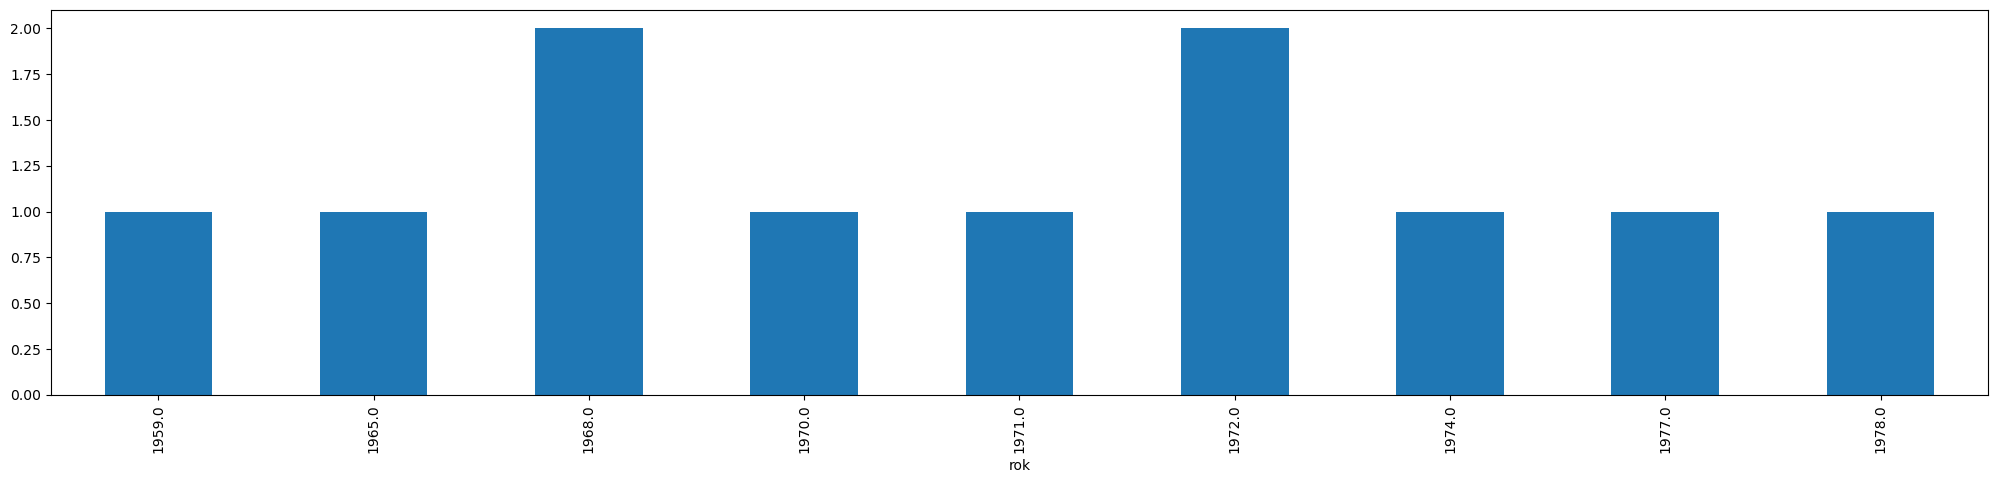

In [59]:
df[df['080_a'].astype(str).str.contains('885-93-322.4')].sort_values(by="rok").groupby("rok").size().plot.bar(figsize=(25,5))

In [60]:
df[df['080_a'].astype(str).str.contains('885-93-322.4')]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk195902548,980331s1959 xr ||| | cze,None,None,None,None,None,None,None,None,None,[885-93-322.4],[aut],[jk01042788],"[Hrnčíř, Svatopluk,]",[1926-2014],None,[Případ skončil v pátek :],[Svatopluk Hrnčíř ; ilustroval Jan Brychta],None,None,None,[1. vyd. v SNDK],None,[Praha :],"[SNDK,]",[1959],[(Vimperk :],[Stráž 4)],None,None,None,None,None,[166 s. ;],None,[8°],[Karavana ;],[sv. 6],[30000 výt.],[Podezřelá ztráta dvou miniaturních radiotelef...,None,[Pro čtenáře od 9 let],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Karavana (Státní nakladatelství dětské knihy)],None,[Povídky detektivní pro mládež],nam a22 1 4500,1959.0,Případ skončil v pátek
bk196501539,970818s1965 xr ||| | cze,None,None,None,None,None,None,None,None,None,"[885-93-322.4-821+92 Čapek, K.]",[aut],[jk01021023],"[Čapek, Karel,]",[1890-1938],None,[Kapesní povídky :],[Karel Čapek ; uspoř. Jana Štefánková ; text k...,None,None,None,[1. vyd. v SNDK i v Klubu mladých čtenářů],None,[Praha :],"[SNDK,]",[1965],None,[(Rudé právo)],None,None,None,None,None,"[243, [3] s. ;]",None,[8°],[Klub mladých čtenářů],None,"[Zdobené předsádky, 25000 výt., Vysvětl.]",[Informativním doslovem a podrobnými vysvětliv...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Klub mladých čtenářů (Státní nakladatelství d...,None,None,nam a22 1 4500,1965.0,Kapesní povídky
bk196803878,970828s1968 xr ||| | cze,None,"[Kčs 17,00]",[(Váz.) :],None,None,None,None,None,None,[885-93-322.4+343.977.1(437)],[aut],[jk01041961],"[Honzík, Miroslav,]",[1928-],None,[Omyl Sherlocka Holmese /],"[Miroslav Honzík, Ilja Kučera ; doslov Rameno ...",None,None,None,[1. vyd.],None,[Praha :],"[SNDK,]",[1968],[(Přerov :],[Tisk 4)],None,None,None,None,None,[226 s. :],"[il., obr. příl., plány ;]",[8°],None,None,[37000 výt.],"[Soubor detektivních povídek, v nichž chtějí a...",None,[Pro čtenáře od 12 let],None,None,None,None,None,None,None,None,None,"[aut, aft, aft]","[jk01070523, None, None]","[Kučera, Ilja,, Grundloch, Karel, Jelínek, Josef]","[1928-2007, None, None]",None,None,None,None,None,None,None,nam a22 1 4500,1968.0,Omyl Sherlocka Holmese
bk196900277,970702s1968 xr ||| | cze,None,None,None,None,None,None,None,None,None,[885-93-322.4],[aut],[jk01120474],"[Souček, Ludvík,]",[1926-1978],None,[Případ ztraceného suchoplavce /],[Ludvík Souček ; Il. Kamil Lhoták],None,None,None,[1. vyd.],None,[Praha :],"[SNDK,]",[1968],[(Liberec :],[Liberecké tisk.)],None,None,None,None,None,"[163, [3] s. ;]",None,[8°],[Střelka ;],[Sv. 56],"[Obálka: Zdeněk Mlčoch, Pro čtenáře od 12 let,...","[Dva detektivní příběhy, v nichž vědecky fundo...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Střelka (Státní nakladatelství dětské knihy)],None,None,nam a22 1 4500,1968.0,Případ ztraceného suchoplavce
bk197002205,970404s1970 xr ||| | cze,None,None,None,None,None,None,None,None,None,[885-93-322.4],[aut],[jk01150584],"[Vondráček, Josef]",None,None,[Zločin v muzeu :],[podle vyprávění jednoho starého dobrého psa-k...,None,None,None,[1. vyd.],None,[Praha :],"[Olympia,]",[1970],[(Hradištko pod Medníkem :],[OTK)],None,None,None,None,None,[[30] s. ;],None,[příč. 8°],None,None,"[Barev. il tit. dvoulist, Dětem od 10 let]",[V této experimentální publikaci byl učiněn po...,None,None,None,None,None,None,None,None,None,None,None,[ill],[jk01073187],"[Malát, Radim,]",[1930-1997],None,None,None,None,None,None,None,nam a22 1 4500,1970.0,Zločin v muzeu
bk197101550,970403s1971 xr cz

In [61]:
mdt = df[['100_a','080_a','titul','rok']].explode('080_a')

In [62]:
mdt[mdt['100_a'].astype(str).str.contains('Jirásek,',na=False)].groupby('080_a').size().nlargest(50)

080_a
821.162.3-31              416
(0:82-311.6)              411
(437.3)                   161
821.162.3-32              120
(0:82-321.6)               98
94(437.3)                  78
930.85                     72
27-878.4                   70
94(437.317)                65
94(437.317)"1692/1695"     65
821.162.3-34               56
(0:82-34)                  55
94(437.3)"13"              51
(048.8)                    50
821.162.3-2                41
(437.313)                  39
27-915/17                  36
94(437.313)                32
(0:82-2)                   28
323.269.6                  28
821.162.3-3                28
(0:82-32)                  27
(437.314)                  27
371.8                      27
929                        21
(075.8)                    20
51(076.5)(075.8)           17
51                         16
(0:82-3)                   15
(081.1)                    14
821.162.3-051              13
(035)                      12
821.162.3-1                12
(0:8

In [63]:
df[df['100_a'].astype(str).str.contains('Čapek, Karel',na=False)].explode('655_a').groupby('655_a').size().nlargest(50)

655_a
české romány                      100
Czech fiction                      77
české prózy                        71
česká dramata                      70
české povídky                      66
fejetony                           64
Czech drama                        56
publikace pro děti                 50
Czech prose                        49
Czech short stories                43
children's literature              42
feuilletons                        42
úvahy                              40
utopické romány                    39
essays                             38
rozhovory                          37
vědecko-fantastické romány         35
utopian novels                     32
české příběhy                      30
autobiografické vzpomínky          28
science fiction novels             28
cestopisné prózy                   26
Czech stories                      25
české pohádky                      25
Czech fairy tales                  22
autobiographical reminiscences     22
interv

In [64]:
df[df['100_a'].astype(str).str.contains('Jirásek',na=False)].explode('072_x').groupby('072_x').size().nlargest(50)

072_x
Česká próza                                                   627
České drama                                                    39
Učební osnovy. Vyučovací předměty. Učebnice                    23
Biografie                                                      17
Literatura pro děti a mládež (beletrie)                        17
Česká poezie                                                   13
Řízení a správa podniku                                        13
Česká literatura                                                9
Česká literatura (o ní)                                         9
Patologie. Klinická medicína                                    8
Dějiny Česka a Slovenska                                        7
Hornictví                                                       7
Matematika                                                      7
Ortopedie. Chirurgie. Oftalmologie                              7
Hospodářská a výrobní odvětví                                   6
Voje

In [65]:
df[df['100_a'].astype(str).str.contains('Němcová, Božena',na=False)].explode('072_a').groupby('072_a').size().nlargest(50)

072_a
821.162.3-3     634
821-93          142
929              17
821.162.3        12
821.162.3.09      9
821.162.4         8
821.162.3-1       4
39                1
821-1/-8          1
dtype: int64

In [66]:
mdt[mdt['100_a'].astype(str).str.contains('Čapek, Karel',na=False)].groupby('080_a').size().nlargest(50)

080_a
(0:82-4)         106
821.162.3-31      98
821.162.3-32      98
821.162.3-2       72
821.162.3-3       71
(0:82-32)         67
(0:82-2)          56
(0:82-31)         51
929               49
821-93            48
(437)             42
32-051            41
(0:82-313.2)      37
316.64            35
(0:82-311.9)      33
(047.53)          30
(0:82-3)          29
(0:82-321.8)      26
(0:82-94)         26
821.162.3-34      25
(0:82-34)         24
885.0-4           21
(0:82-322.4)      20
821.162.3-051     18
(082.21)          15
636.7             15
885.0-32          15
32                14
634/635           14
(0.027.6)         13
(046)             13
(0:82-22)         11
323               11
885.0-31          11
(437.3)           10
885.0-2           10
885-21             7
(084.12)           6
(0:82-313.1)       6
636.8              6
821.162.3          6
821.162.3-4        6
885.0-1            6
885.0-34           6
(0.027)=030        5
(081.1)            5
(0:82-84)          5
(0:82-9

In [67]:
mdt[mdt['100_a'].astype(str).str.contains('Poláček, Karel',na=False)].groupby('080_a').size().nlargest(50)

080_a
821.162.3-31     100
(0:82-311.5)      71
821-93            36
821.162.3-32      35
(0:82-321.5)      32
821.162.3-3       18
(081.1)           17
885.0-31          14
82-93             12
(0:82-31)         10
(0:82-4)           7
(0:82-313.1)       6
(0:82-36)          6
82-7               6
821.162.3          6
(=411.16)          5
821.162.3-051      5
821.162.3-2        5
(0:82-2)           4
296                4
885.0-7            4
(046)34            3
(093.3)            3
(0:82-32)          3
929                3
(035)              2
(046)              2
(0:82-311.4)       2
(437.3)            2
159.942.4          2
612                2
612.648            2
616                2
80-93              2
82-36              2
82-84              2
885.0-32           2
885.0-34           2
885.0-36           2
940.3/.4           2
(0.027.6)          1
(0.072)            1
(038)81            1
(048.8)            1
(082.21)           1
(0:82-22)          1
(0:82-25)791       1
(0:82-6

In [68]:
mdt[mdt['100_a'].astype(str).str.contains('Malířová, Helena',na=False)].groupby('080_a').size().nlargest(50)

080_a
821.162.3-31                                         13
(0:82-31)                                             8
885.0-31                                              4
885-311.1-312.6:92 Malířová, H.                       3
(0:82-312.6)                                          3
821.162.3-055.2                                       3
885.0                                                 2
929                                                   2
821.162.3-2                                           1
885-31:[792(437):92 Kopecký, M.+92 Debureau, J.G.     1
92 Malířová, H.                                       1
92 Debureau, J. G.                                    1
885.0-4/-9                                            1
(0:82-34)                                             1
82-93                                                 1
885-32                                                1
885-312.6:792(437):92 Kopecký, M.                     1
821.162.3-32                              

In [69]:
mdt[mdt['100_a'].astype(str).str.contains('Páral, Vladimír',na=False)].groupby('080_a').size().nlargest(50)

080_a
821.162.3-31     58
(0:82-31)        10
885.0-31          7
821.162.3-2       3
(0:82-311.9)      3
821.162.3-32      3
(0:82-2)          3
(092)             2
885.0-312.9       2
821.162.3-3       2
070.421           2
821.162.3-051     2
(437.3)           2
(0:82-32)         2
(0:82-3)          2
929               2
(0:82-993)        1
dtype: int64

In [70]:
mdt[mdt['100_a'].astype(str).str.contains('Elgart',na=False)].groupby('080_a').size().nlargest(50)

080_a
(0:82-31)        4
821.162.3-31     4
(047.1)          2
(0:82-32)        2
614.21           2
821.162.3-32     2
885.0-31         2
(0.027.6)        1
(0:82-2)         1
(0:82-3)         1
(0:82-94)        1
821.162.3-051    1
821.162.3-2      1
821.162.3-3      1
885-311.4        1
929              1
dtype: int64

In [71]:
df[df['100_a'].astype(str).str.contains('Poláček, Karel',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk192601141,001015s1925 xr ||| | cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Pásky na vousy :],[Karel Poláček],None,None,None,None,None,[Praha :],"[Evžen K. Rosendorf,]",[1925],None,[(Fr. Ziegner)],None,None,None,None,None,[90 s. ;],None,[18 cm],[Hry českého jeviště ;],[23],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Hry českého jeviště],None,None,nam a22 1 4500,1925.0,Pásky na vousy
bk192601569,010106s1925 xr cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Na prahu neznáma :],[Karel Poláček],None,None,None,None,None,[V Praze :],"[Fr. Borový,]",[1925],[([Brno :],[Polygrafie])],None,None,None,None,None,"[86, [1] s. ;]",None,[8°],[Knížky dobré pohody ;],[2],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Knížky dobré pohody],None,None,nam a22 1 4500,1925.0,Na prahu neznáma
bk192605038,010112s1926 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Lehká dívka a reportér /],[Karel Poláček ; ilustroval O. Mrkvička],None,None,None,None,None,[Praha :],"[F. Topič,]",[1926],None,[([Unie])],None,None,None,None,None,[168 s. :],[il ;],[8°],[Knihovna Švandy Dudáka ;],[sv. 5],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Knihovna Švandy Dudáka],None,None,nam a22 1 4500,1926.0,Lehká dívka a reportér
bk192700904,000206s1925 xr 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Čtrnáct dní na vojně /],[Karel Poláček],None,None,[14 dní na vojně],None,None,None,None,None,None,None,None,[Praha :],"[Obelisk,]",[1925],[1],[60 stran ;],None,[16 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,1925.0,Čtrnáct dní na vojně
bk192701468,000217s1926 xr ||| | cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Povídky israelského vyznání /],[Karel Poláček],None,None,None,None,None,[Praha :],"[Pokrok,]",[1926],None,None,None,None,None,None,None,[76 s. ;],None,[8°],[Dobrá četba ;],[sv. 11],None,None,None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,1926.0,Povídky israelského vyznání
bk192705023,000613s1927 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Život ve filmu /],[Karel Poláček ; s kresbami Vojtěcha Tittelbacha],None,None,None,None,None,[Praha :],"[Pokrok,]",[1927],None,None,None,None,None,None,None,[79 s. ;],None,[8°],[Dobrá četba ;],[sv. 32],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,1927.0,Život ve filmu
bk192802799,990827s1927 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01100136],"[Poláček, Karel,]",[1892-1945],None,[Okolo nás /],[Karel Poláček],None,None,None,None,None,[Praha :],"[Čin,]",[1927],[([Val. Meziříčí :],[Osvěta])],None,None,None,None,None,"[156 s., 2 listy ;]",None,[8°],[Kruh drobné beletrie ;],[2],None,None,None,None,None,None,None,None,None,None,None,N

In [72]:
df[df['100_a'].astype(str).str.contains('Weiss, Jan',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk192702159,000116s1927 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01151540],"[Weiss, Jan,]",[1892-1972],None,[Fantom smíchu /],[Jan Weiss],None,None,None,None,None,[Praha :],"[[Pokrok],]",[1927],None,None,None,None,None,None,None,"[93 s., 1 ins. list ;]",None,[8°],[Dobrá četba ;],[20],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,1927.0,Fantom smíchu
bk192703329,000112s1927 xr ||| | cze,None,None,[(Váz.)],None,None,None,None,None,None,None,[aut],[jk01151540],"[Weiss, Jan,]",[1892-1972],None,"[Zrcadlo, které se opožďuje /]",[Jan Weiss],None,None,None,None,None,[Praha :],"[František Svoboda a Roman Solař,]",[1927],None,[(Československý kompas)],None,None,None,None,None,"[129 s., 1 list ;]",None,[8°],[Mladí autoři ;],[20],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Mladí autoři (František Svoboda a Roman Solař)],None,None,nam a22 1 4500,1927.0,"Zrcadlo, které se opožďuje"
bk192905623,991213s1929 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01151540],"[Weiss, Jan,]",[1892-1972],None,[Dům o 1000 patrech /],[Jan Weiss],None,None,None,None,None,[[Praha] :],"[Melantrich,]",[[1929],[(Turnov :],[Müller a spol.])],None,None,None,None,None,[236 - [III] s. ;],None,[8°],[Úroda : sbírka krásné prózy ;],[sv. 2],[Úprava V. Maška],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Úroda (Melantrich)],None,None,nam a22 1 4500,1929.0,Dům o 1000 patrech
bk192906953,991029s1927 xr a e 000 j cze,None,None,[(Váz.)],None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],[jk01151540],"[Weiss, Jan,]",[1892-1972],None,[Barák smrti /],[Jan Weiss ; ilustroval Otta Matoušek],None,None,None,None,None,[V Praze :],"[Volná myšlenka československá,]",[1927],None,[(Ant. Reis)],None,None,None,None,None,[131 s. :],[il. ;],[8°],[Ilustrovaná knihovna Volné myšlenky ;],"[sv. 5, r. 1927]",[S obrázkovou obálkou],None,None,None,None,None,None,None,None,None,None,None,"[české povídky, výbory]",None,None,None,None,None,None,None,None,[Knihovna Volné myšlenky],None,None,nam a22 4500,1927.0,Barák smrti
bk193004125,991206s1930 xr 000 f cze,None,None,[(Váz.)],None,None,None,None,None,None,None,[aut],[jk01151540],"[Weiss, Jan,]",[1892-1972],None,[Bláznivý regiment /],[Jan Weis],None,None,None,None,None,[Praha :],"[Vladimír Orel,]",[1930],None,[(Impressa)],None,None,None,None,None,[240 s. ;],None,[18 cm],"[Kniha všem ;, II. desítka ;]","[sv. 69, sv. 3]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Kniha všem, II. desítka]",None,None,nam a22 a 4500,1930.0,Bláznivý regiment
bk193104428,991024s1930 xr 000 0 cze,None,None,None,None,None,None,None,None,None,None,[aut],None,"[Weiss, Jan]",None,None,[Razítka na známkách čsl. pošty v plebiscitním...,[Jan Weiss],None,None,None,None,None,[V Praze :],"[Svaz čsl. filatelistických spolků,]",[1930],None,None,None,None,None,None,None,[23 s. ;],None,[8°],[Filatelistické příručky ;],[seš. 11],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Filatelistické příručky],None,None,nam a22 1a 4500,1930.0,Razítka na známkách čsl. pošty v plebiscitním ...
bk193104429,991024s1931 xr ||| | cze,None,None,[(Váz.)],None,None,None,None,None,None,None,[aut],[jk01151540],"[Weiss, Jan,]",[1892-1972],None,[Škola zloči

## Kandidátské kódy

In [74]:
mdt[mdt['080_a'] == '(0:82-31)'].sample(20)

,100_a,080_a,titul,rok
001,,,,
nkc20162841822,"[Roberts, Nora,]",(0:82-31),Kruh věrných,2016.0
nkc20193117951,"[Morton, Kate,]",(0:82-31),Tajemství letního odpoledne,2019.0
cpk20172926981,"[Konečný, Julius]",(0:82-31),Osudný dar,1941.0
cpk20041283395,"[Grisham, John,]",(0:82-31),Porota,2003.0
cpk20051487943,"[Burroughs, William S.]",(0:82-31),Západní země,2004.0
nkc20061700981,"[Culicchia, Giuseppe,]",(0:82-31),Bla bla bla,2006.0
nkc20233510479,"[Limberk, Lenka,]",(0:82-31),Reg Dolls: dejchej nebo se udus,2023.0
nkc20102029618,"[Moc, Stanislav,]",(0:82-31),Údolí nočních papoušků,2010.0
nkc20142637320,"[Guillou, Jan,]",(0:82-31),Velké stolet,2014.0


<Axes: xlabel='rok'>

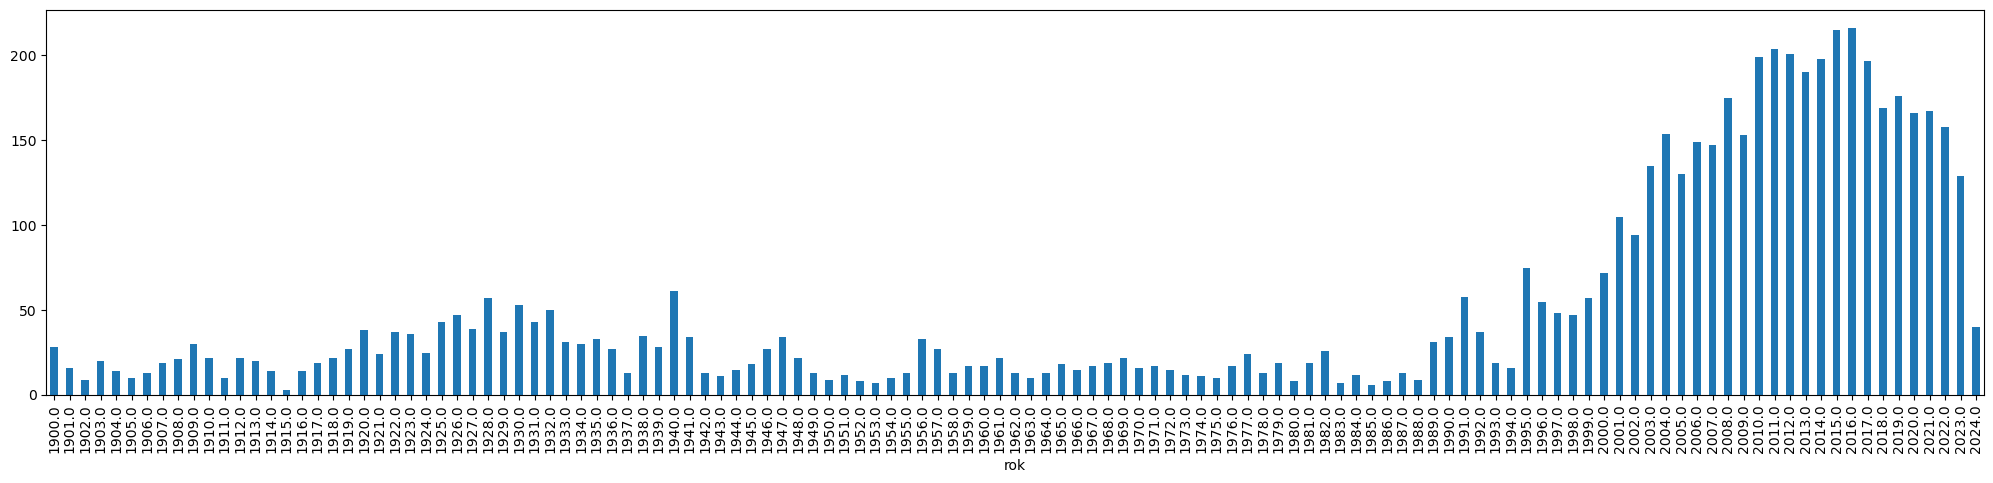

In [75]:
mdt[mdt['080_a'] == '821.162.3-3'].groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

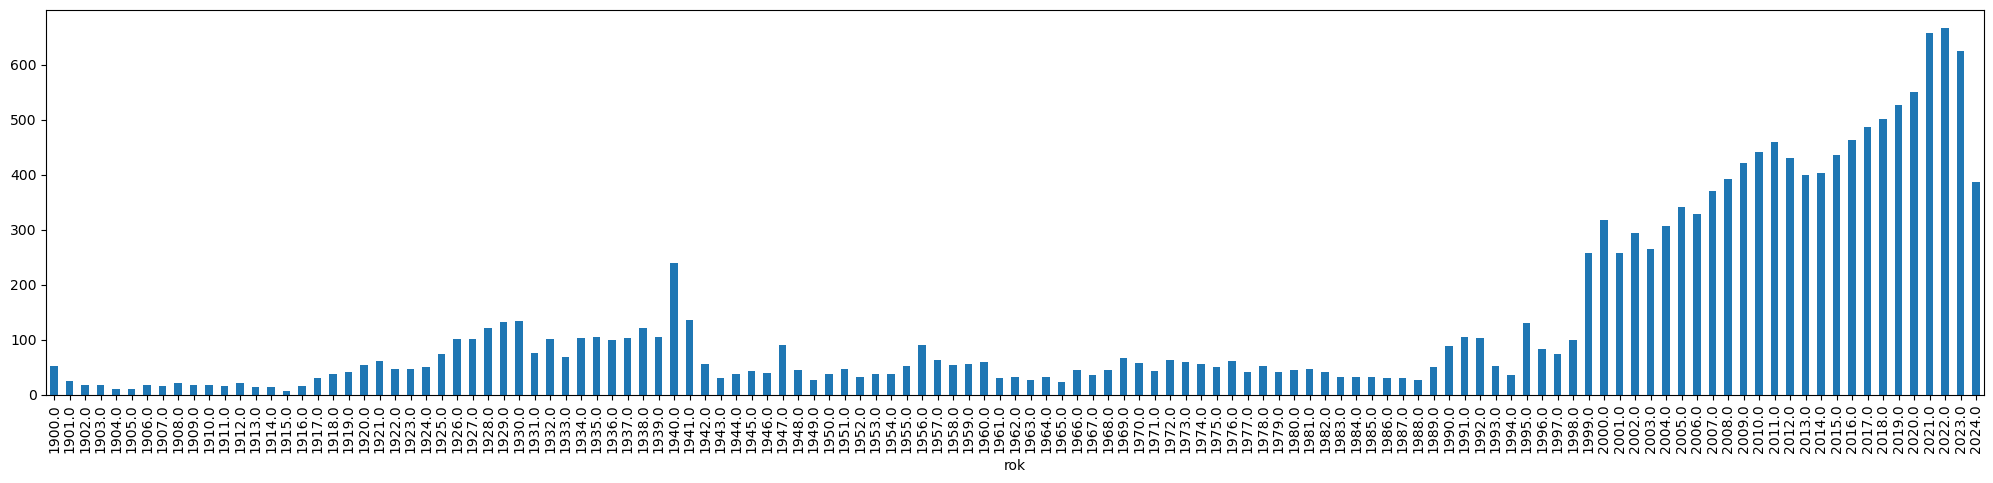

In [76]:
mdt[mdt['080_a'] == '821.162.3-31'].groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

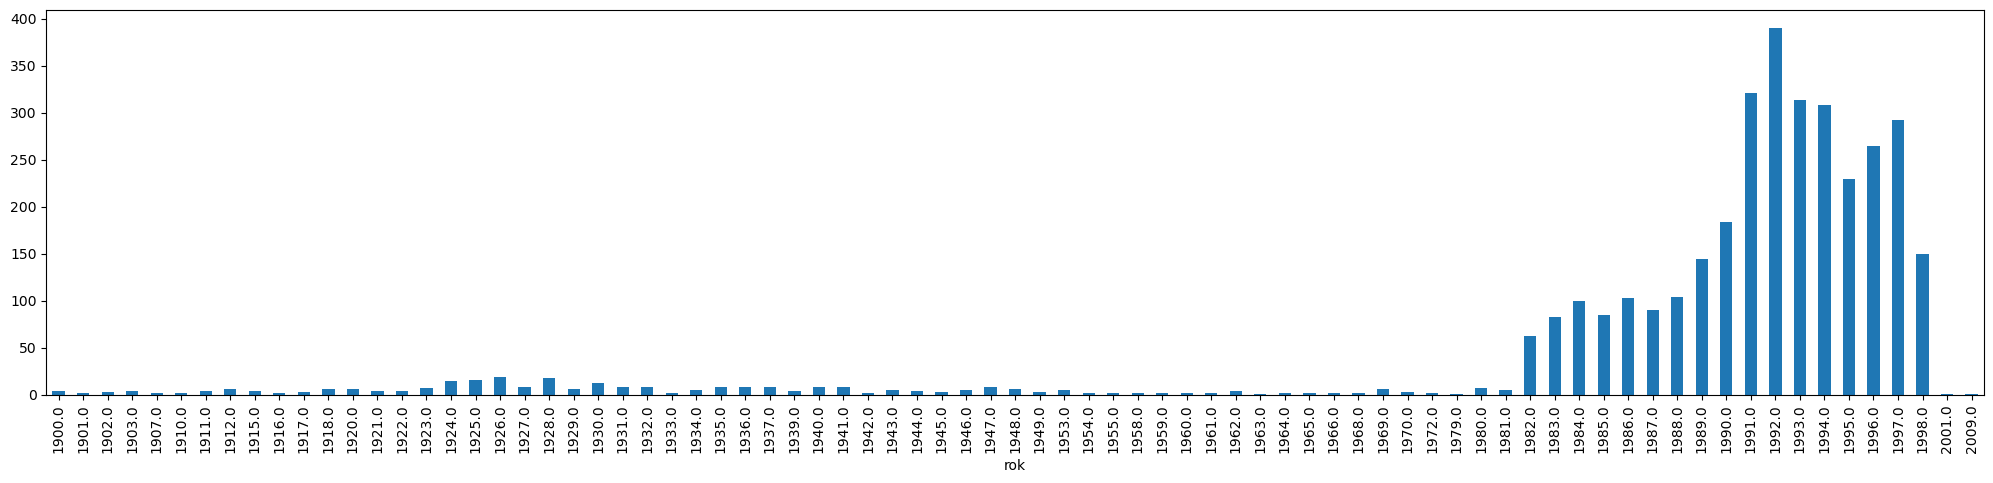

In [77]:
mdt[mdt['080_a'] == '885.0-31'].groupby('rok').size().plot.bar(figsize=(25,5))

In [78]:
mdt[mdt['080_a'] == '885.0-31'].sample(50)

,100_a,080_a,titul,rok
001,,,,
cpk19970290232,"[Součková, Milada,]",885.0-31,Odkaz,1997.0
np9305965,"[Jestřabec, Pavel]",885.0-31,Láska paní továrníkové,1992.0
np9536841,"[Suchl, Jan,]",885.0-31,Čas jako stvořený pro lásku,1995.0
ck9102811,"[Burkovec, George,]",885.0-31,Gorby fiction,1991.0
cpk19960115850,"[Drábek, Jan,]",885.0-31,Listerovo dědictví,1996.0
ck8907251,"[Beneš, Arnošt]",885.0-31,Nejdelší noc,1989.0
ck8304636,"[Vostrá, Alena,]",885.0-31,Všema čtyřma očima,1982.0
np9428788,"[Švandrlík, Miloslav,]",885.0-31,Doktor od Jezera hrochů,1994.0
bk198203676,"[Rudolf, Stanislav,]",885.0-31,Barvoslepý,1982.0


<Axes: xlabel='rok'>

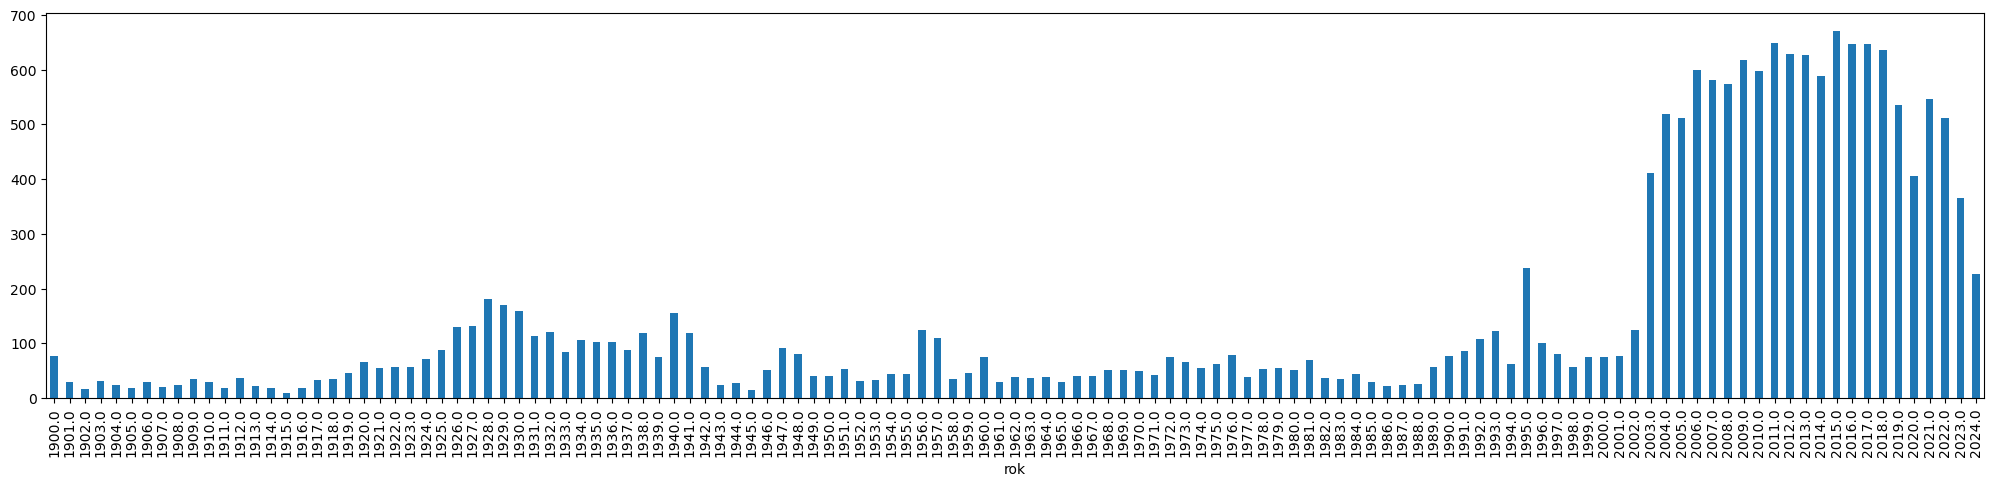

In [79]:
mdt[mdt['080_a'] == '(0:82-31)'].groupby('rok').size().plot.bar(figsize=(25,5))

In [80]:
mdt[mdt['080_a'] == '(0:82-31)'].sample(50)

,100_a,080_a,titul,rok
001,,,,
nkc20193076719,"[McPartlin, Anna,]",(0:82-31),V klubíčku štěstí,2019.0
cpk20172926667,"[Barila, Adam]",(0:82-31),Zákon je silnější ...,1940.0
nkc20051531676,"[Lanczová, Lenka,]",(0:82-31),Lásky a nálezy,2004.0
cpk19990631789,"[Leblanc, Maurice,]",(0:82-31),Úžasná událost,1923.0
nkc20203255331,"[Dutka, Wojciech,]",(0:82-31),Černá a purpurová,2020.0
nkc20182994108,"[Lonsdale, Kerry]",(0:82-31),"Všechno, co jsme opustili",2018.0
nkc20132536979,"[Lawrence, D. H.]",(0:82-31),Milenec lady Chatterleyové,2014.0
nos190258037,"[Zola, Émile,]",(0:82-31),Poklesek abbého Moureta,1923.0
nkc20061663995,"[Brooke, Lauren]",(0:82-31),Po bouři,2006.0


<Axes: xlabel='rok'>

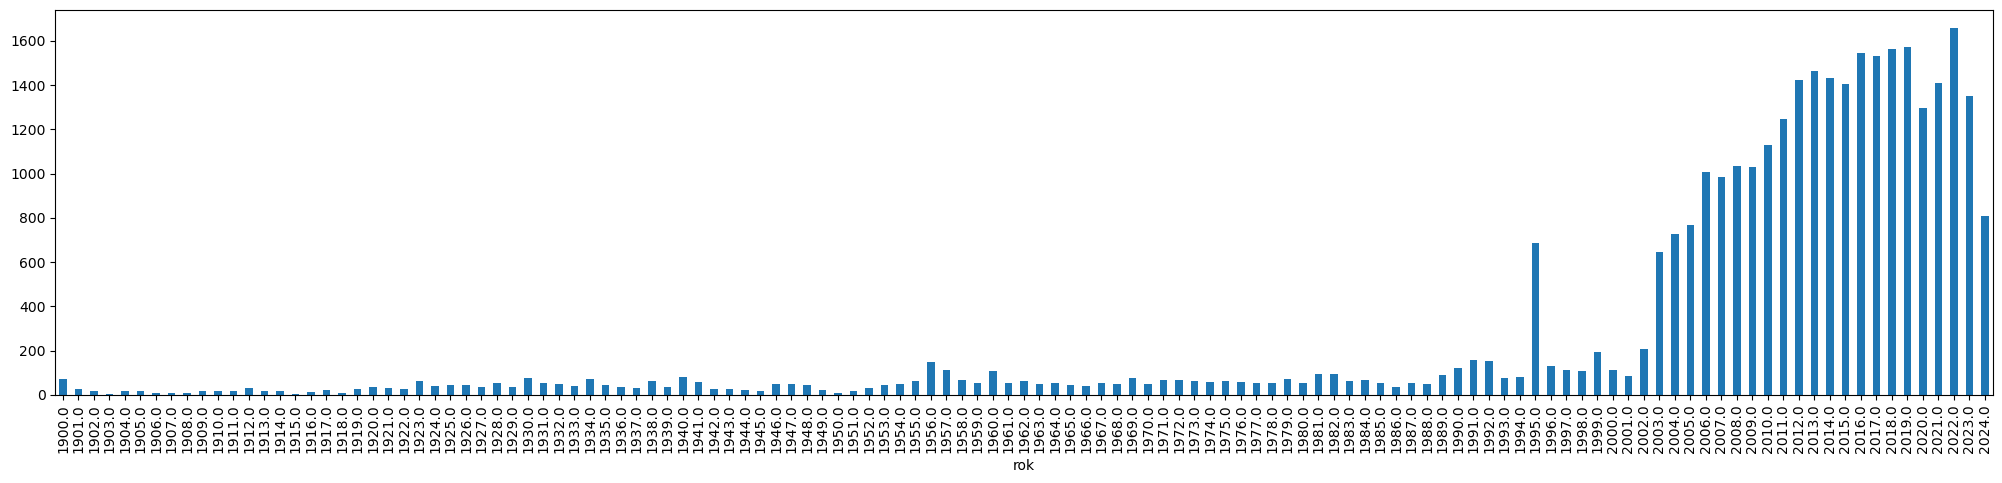

In [81]:
mdt[mdt['080_a'] == '821-93'].groupby('rok').size().plot.bar(figsize=(25,5))

In [82]:
mdt[mdt['080_a'] == '821-93'].sample(50)

,100_a,080_a,titul,rok
001,,,,
cpk20041489212,"[Čtvrtek, Václav,]",821-93,Manka,2004.0
nkc20162777793,"[Ruiz Ibáñez, Celia,]",821-93,Pohádkový svět příběhů a bajek,2015.0
nkc20172899232,"[Váchová, Šárka,]",821-93,Chaloupka na vršku,2016.0
np9529766,"[Žáček, Jiří,]",821-93,Počítání oveček,1995.0
nkc20203233178,"[Bordin, Claudia]",821-93,Postav si své jednorožce,2020.0
nkc20162840503,"[Chytková, Olga,]",821-93,Když vzpomínky už nebolí!,2016.0
nkc20182970671,"[Háj, Felix,]",821-93,Školák Kája Mařík,1933.0
nkc20172880596,"[Mass, Wendy,]",821-93,Za trest třináctiletá,2017.0
nos190250001,"[Tesařová, Ludmila,]",821-93,Kašpárek jde do světa,1924.0


In [83]:
mdt[mdt['080_a'] == '930.85'].sample(50)

,100_a,080_a,titul,rok
001,,,,
nkc20112163355,"[Burke, Peter,]",930.85,Co je kulturní historie?,2011.0
cpk20031290959,None,930.85,"Duchem, ne mečem",2003.0
nkc20071717038,"[Kenner, T. A.]",930.85,Symboly a jejich skrytý význam,2007.0
nkc20142633393,None,930.85,"Vzdělanec nad hranicemi ""provincionality""",2014.0
nkc19971166086,"[Wiesner, Ivo,]",930.85,Národ v lénu bohů,1996.0
nkc20223486277,"[Ammerer, Gerhard,]",930.85,Čechy - Morava - Vídeň,2022.0
nkc20193096808,"[Fraser, Evan D. G.,]",930.85,Impérium jídla,2019.0
cpk20010889513,"[Däniken, Erich von,]",930.85,Vzpomínky na budoucnost,2001.0
nkc20102145521,"[Štěpánová, Petra,]",930.85,Antické a biblické pojetí krásna,2010.0


In [84]:
mdt[mdt['080_a'] == '885.0-3'].sample(30)

,100_a,080_a,titul,rok
001,,,,
ck9103432,"[Hrabal, Bohumil,]",885.0-3,Něžný barbar,1990.0
cpk19970279886,"[Inquort, Jiří,]",885.0-3,"Vnitřní život Karla Jana, a proto, Přílišná up...",1995.0
np9314925,"[Linhartová, Věra,]",885.0-3,Ianus tří tváří,1993.0
np9421959,None,885.0-3,Čtení bez cenzury,1990.0
np9429743,None,885.0-3,Hlavní téma: psychologická próza,1994.0
cpk19960165175,"[Mardoša,]",885.0-3,Cool v plotě,1995.0
cpk19960116306,"[Svozil, Bohumil,]",885.0-3,Próza obrazná i věcná,1995.0
ck9309255,"[Chalupecký, Jindřich,]",885.0-3,Expresionisté,1992.0
cpk19980312441,"[Volf, Honza,]",885.0-3,"A stejně, že je život krásnej?, i kdyš [sic] s...",1998.0


<Axes: xlabel='rok'>

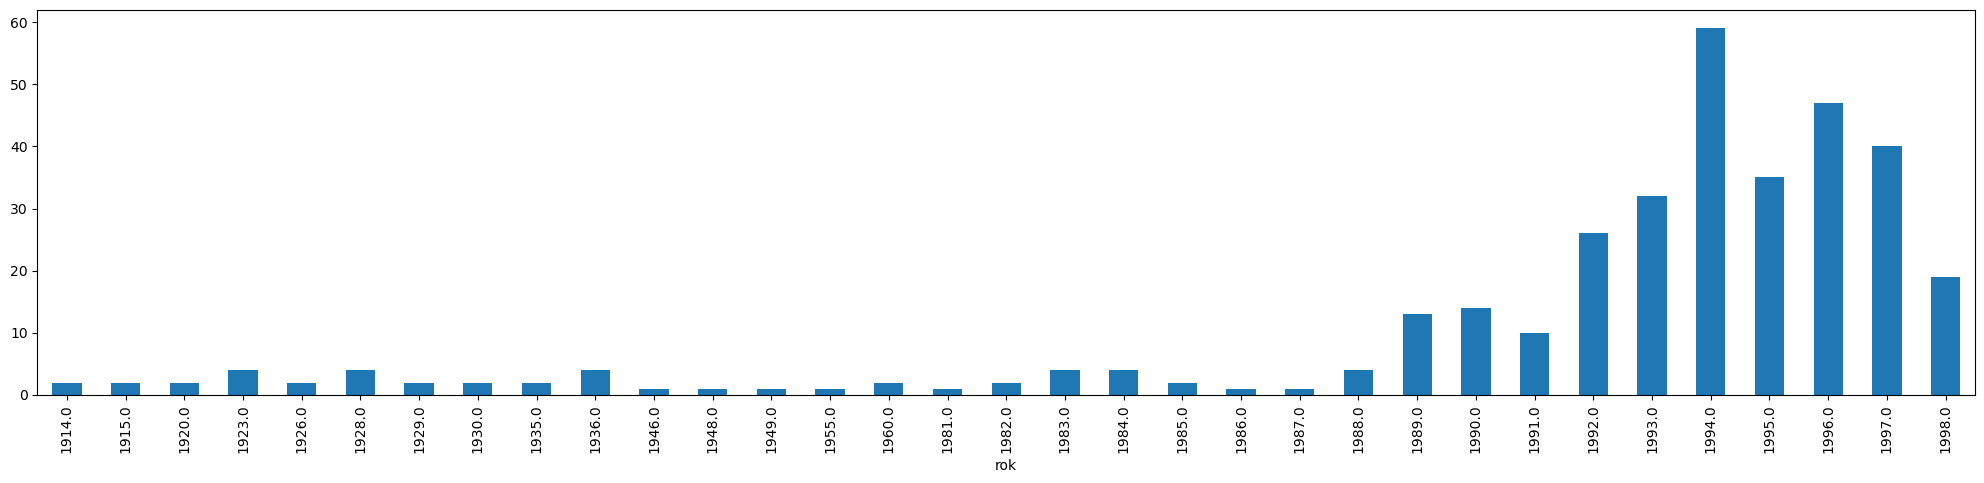

In [85]:
r(mdt[mdt['080_a'] == '885.0-3'])

In [86]:
mdt[mdt['080_a'] == '885.0-3'].sample(30)

,100_a,080_a,titul,rok
001,,,,
cpk19970202722,"[Deml, Jakub,]",885.0-3,Jugo,1936.0
cpk19960149508,"[Murrer, Ewald,]",885.0-3,Sny na konci noci,1996.0
np9424141,"[Vodička, Felix,]",885.0-3,Počátky krásné prózy novočeské,1994.0
ck8807803,None,885.0-3,Novyje češskije knig,1988.0
cpk19970202722,"[Deml, Jakub,]",885.0-3,Jugo,1936.0
cpk19980371026,"[Dryje, František,]",885.0-3,Mrdat,1998.0
cpk19970182893,"[Staněk, Jiří,]",885.0-3,Věrnosti,1996.0
np9423141,None,885.0-3,Vše o Vlastě Javořické,1994.0
cpk19960104400,"[Skácel, Jan,]",885.0-3,Jedenáctý bílý kůň,1996.0


<Axes: xlabel='rok'>

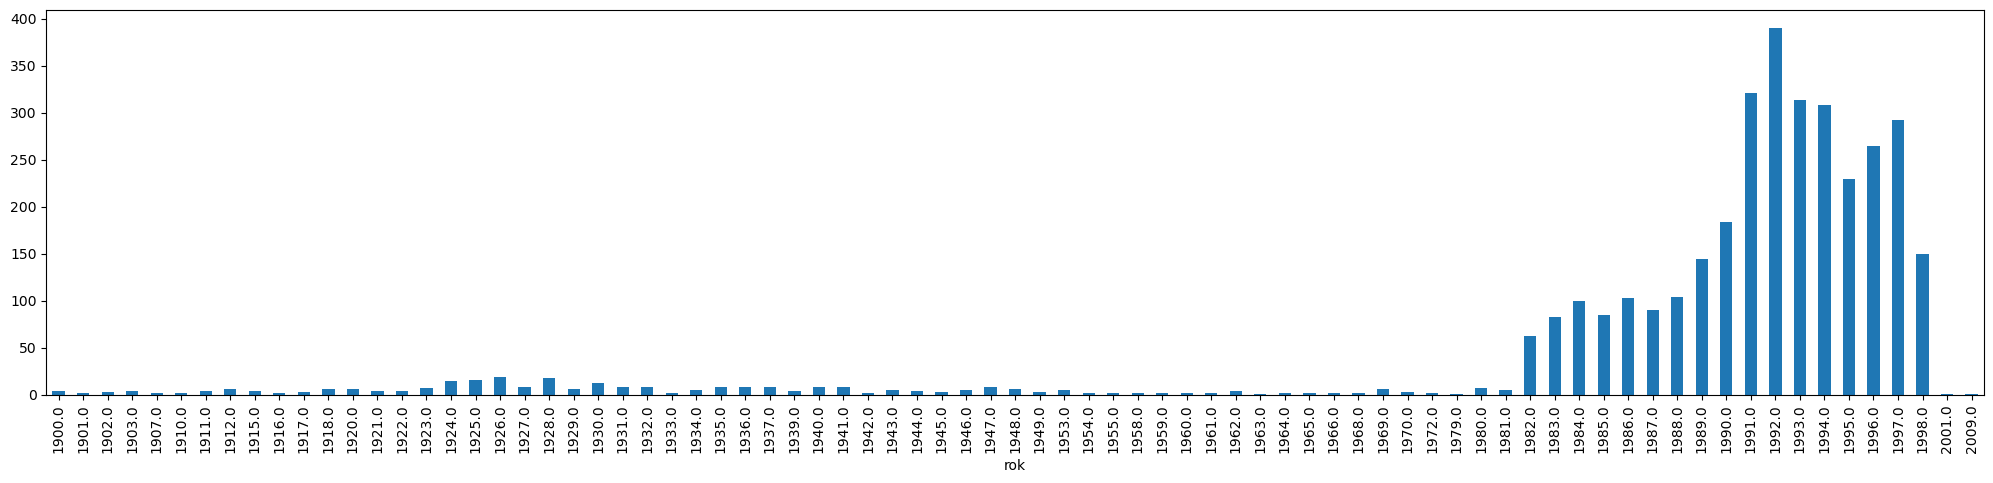

In [87]:
r(mdt[mdt['080_a'] == '885.0-31'])

In [88]:
mdt[mdt['080_a'] == '885.0-34'].sample(30)

,100_a,080_a,titul,rok
001,,,,
np9307773,"[Michna, Vladimír,]",885.0-34,Pohádky o princích a princeznách,1992.0
cpk19960103314,"[Ryska, Jan,]",885.0-34,Kytlický vodník,1995.0
ck9102215,"[Langer, Jiří,]",885.0-34,Devět bran,1990.0
ck9005963,"[Vorel, Josef,]",885.0-34,O lesních žínkách a jiné pověsti ze Žluticka,1990.0
ck9104446,None,885.0-34,Sůl nad zlato,1991.0
np9423265,"[Petiška, Eduard,]",885.0-34,Martínkova čítanka a dvě klubíčka pohádek,1994.0
ck8700915,"[Kudrlička, Vilém,]",885.0-34,Šumavské pověsti,1986.0
np9422210,"[Mašatová, Milada,]",885.0-34,Hebe hebe hebere,1993.0
ck9201332,"[Heyduk, Richard]",885.0-34,Plinlimon,1991.0


## Trik s českým autorstvem

In [90]:
mdt = mdt.explode('100_a')

In [91]:
ceske_autorstvo = mdt[mdt['080_a'].isin(['821.162.3-31','821.162.3-31','821.162.3-32'])]['100_a'].drop_duplicates().to_list()

In [92]:
len(ceske_autorstvo)

9158

<Axes: xlabel='rok'>

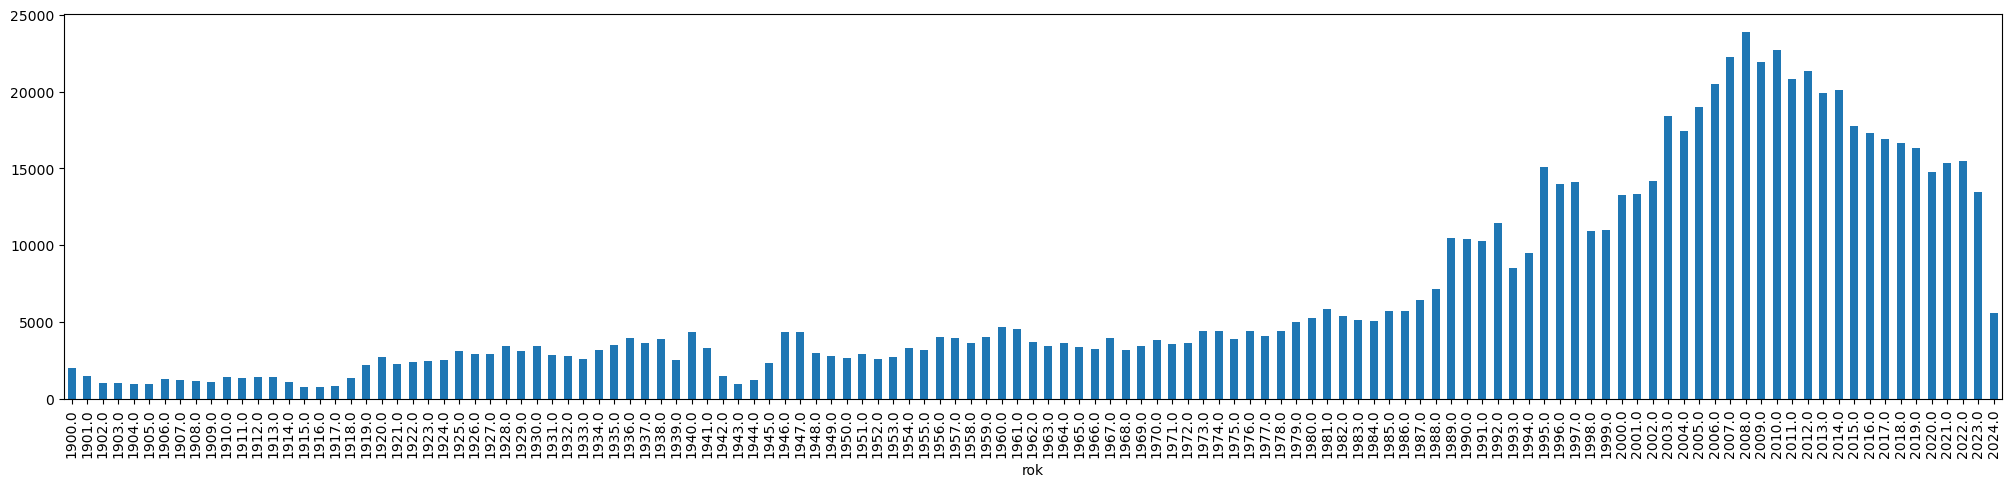

In [93]:
r(mdt[mdt['100_a'].isin(ceske_autorstvo)])

In [94]:
mdt[mdt['100_a'].isin(ceske_autorstvo)].groupby('100_a').size().nlargest(20)

100_a
Jirásek, Alois,             2587
Čapek, Karel,               1981
Němcová, Božena,            1906
Masaryk, Tomáš Garrigue,    1368
Šulc, Petr,                 1191
Neruda, Jan,                1148
May, Karl,                  1082
Lada, Josef,                1002
Javořická, Vlasta,           925
Pospíšilová, Zuzana,         916
Žáček, Jiří,                 906
Foglar, Jaroslav,            878
Cílek, Roman,                854
Petiška, Eduard,             770
Vondruška, Vlastimil,        769
Miler, Zdeněk,               763
Bauer, Jan,                  730
Mácha, Karel Hynek,          675
Březinová, Ivona,            653
Rais, Karel Václav,          643
dtype: int64

<Axes: xlabel='rok'>

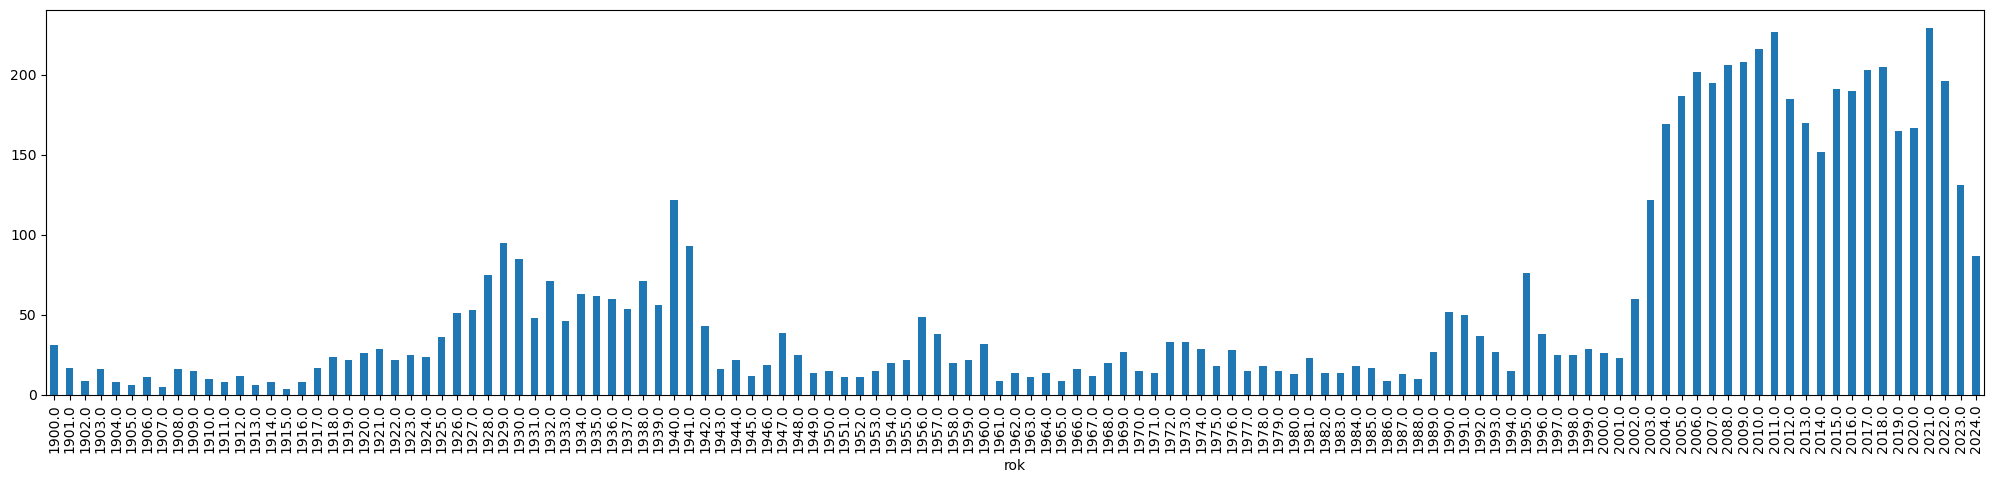

In [95]:
r(mdt[mdt['100_a'].isin(ceske_autorstvo) & mdt['080_a'].isin(['(0:82-31)'])])

<Axes: xlabel='rok'>

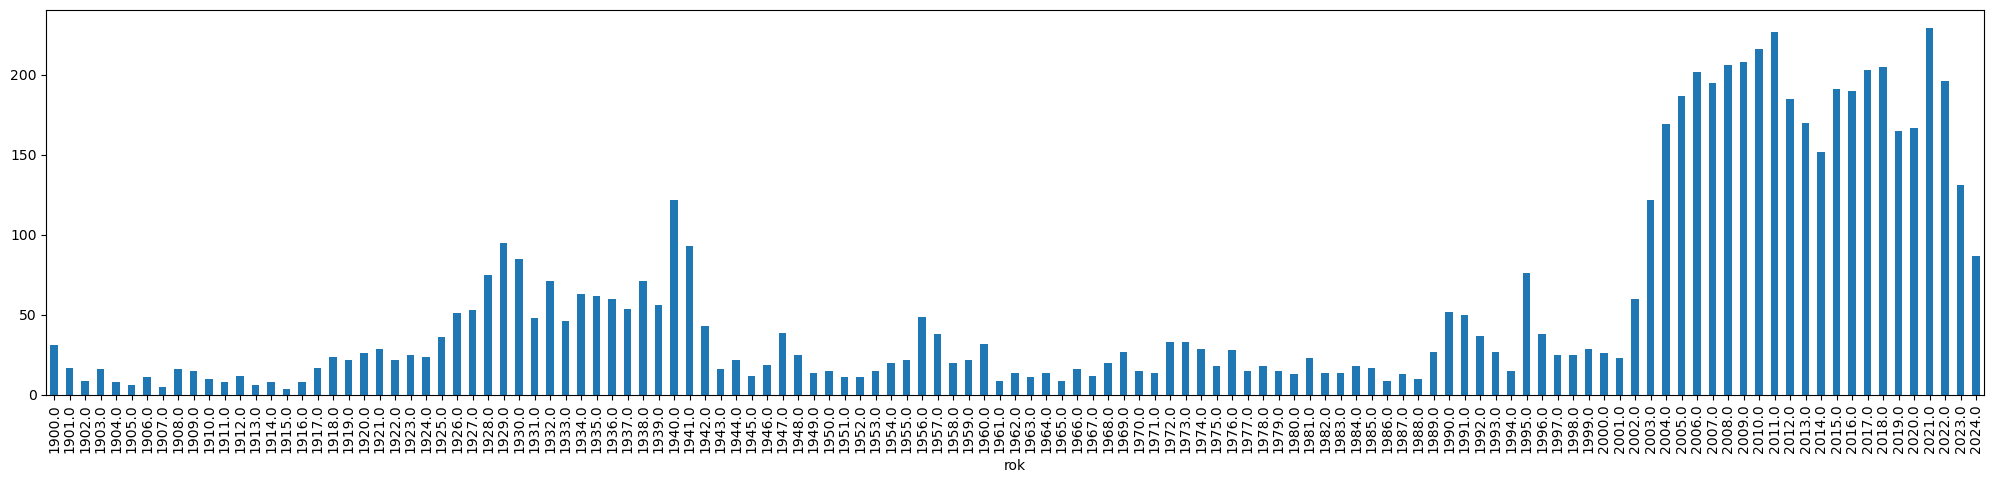

In [96]:
r(mdt[mdt['100_a'].isin(ceske_autorstvo) & (mdt['080_a'] == '(0:82-31)')])

<Axes: xlabel='rok'>

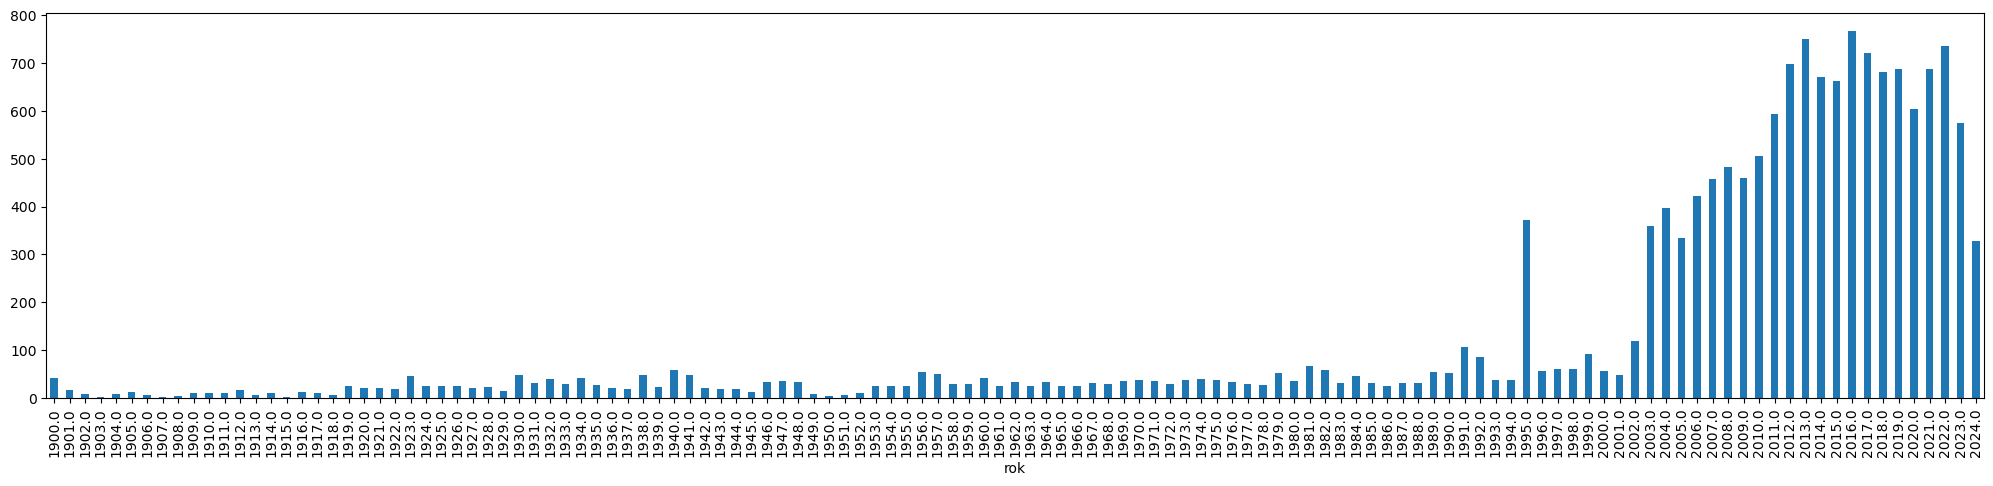

In [97]:
r(mdt[mdt['100_a'].isin(ceske_autorstvo) & (mdt['080_a'] == '821-93')])

<Axes: xlabel='rok'>

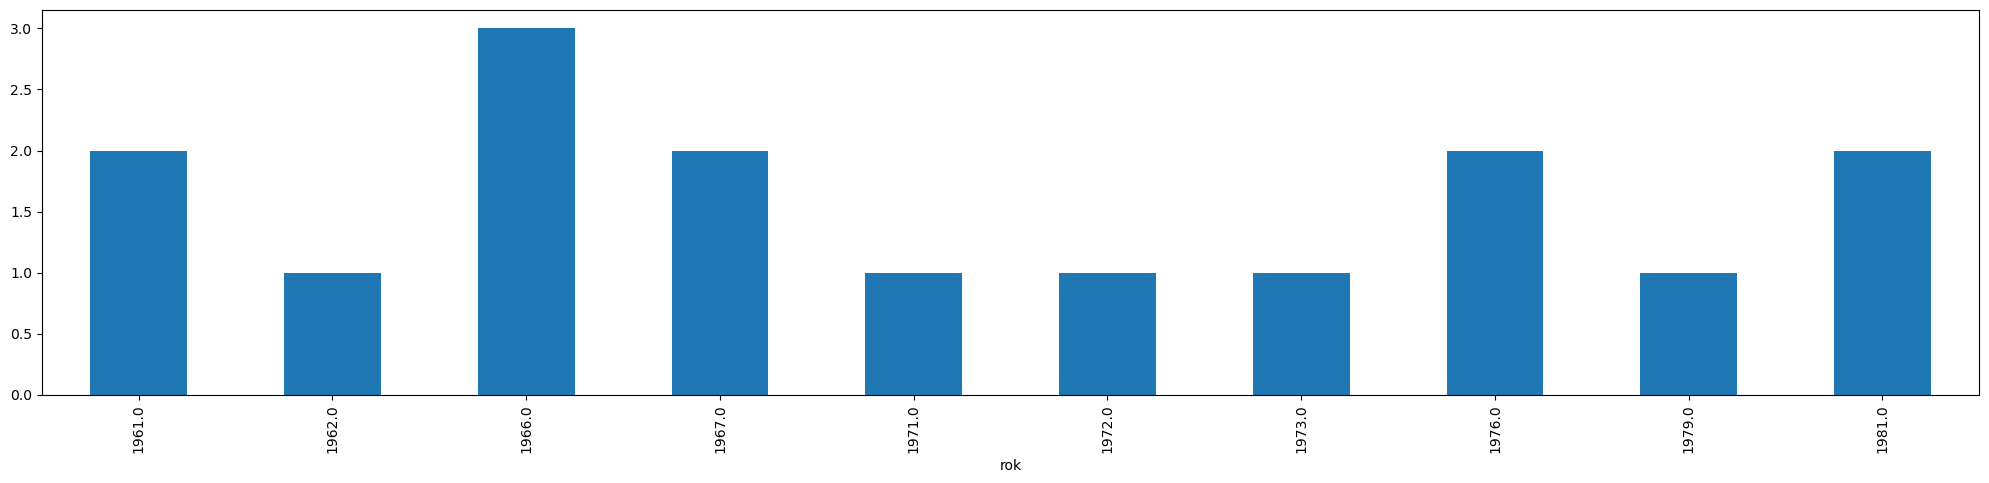

In [98]:
r(mdt[mdt['080_a'].str.contains('82-31') & mdt['080_a'].str.contains('885')])

## Finální výběr filtrů: romány

<Axes: xlabel='rok'>

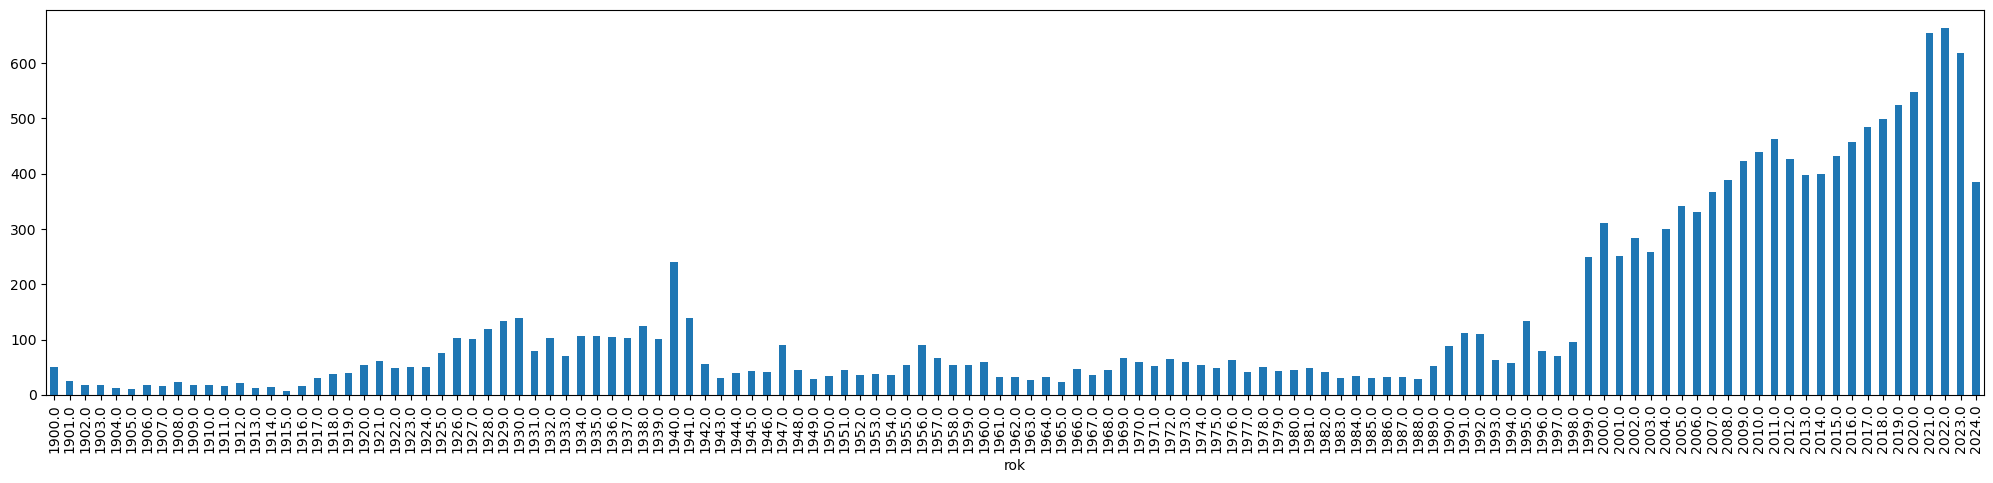

In [100]:
r(df[df['655_a'].astype(str).str.lower().str.contains('české romány', na=False)])

<Axes: xlabel='rok'>

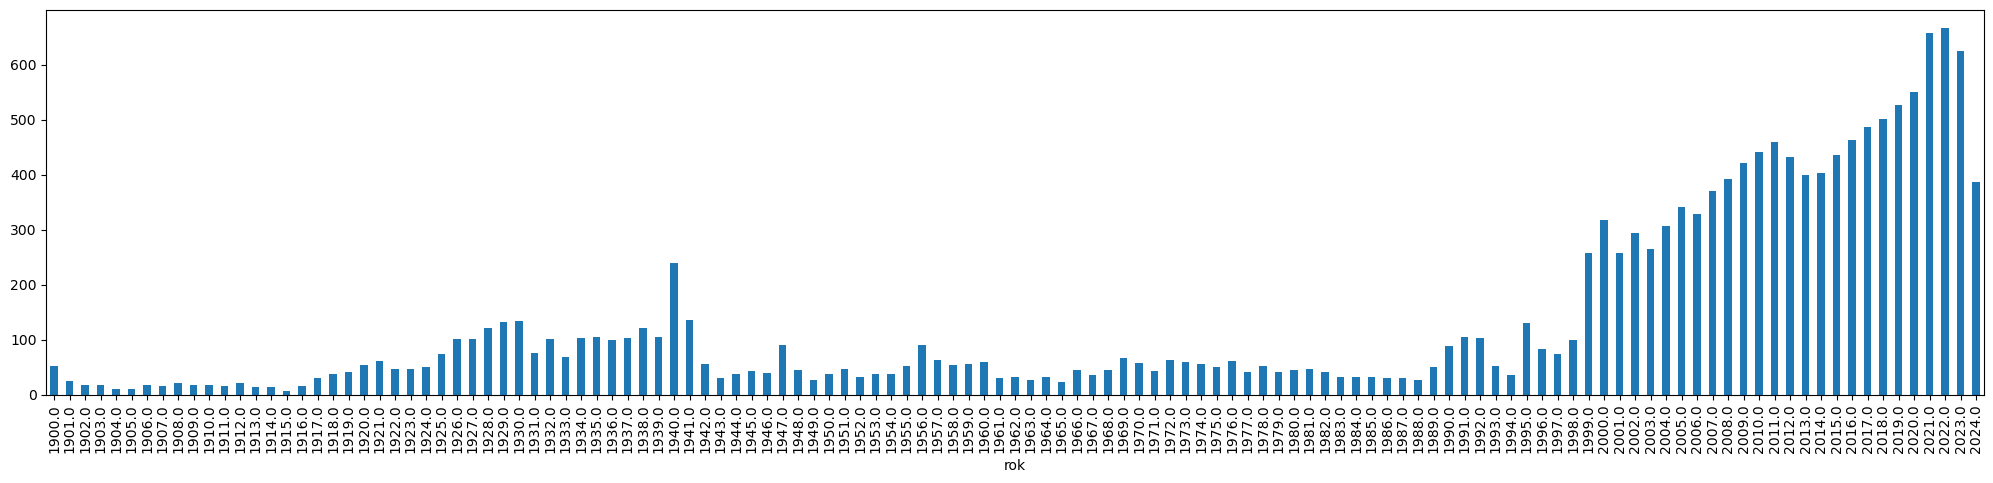

In [101]:
r(mdt[mdt['080_a'].astype(str).str.contains('821.162.3-31',na=False)])

## Finální výběr filtrů: próza

<Axes: xlabel='rok'>

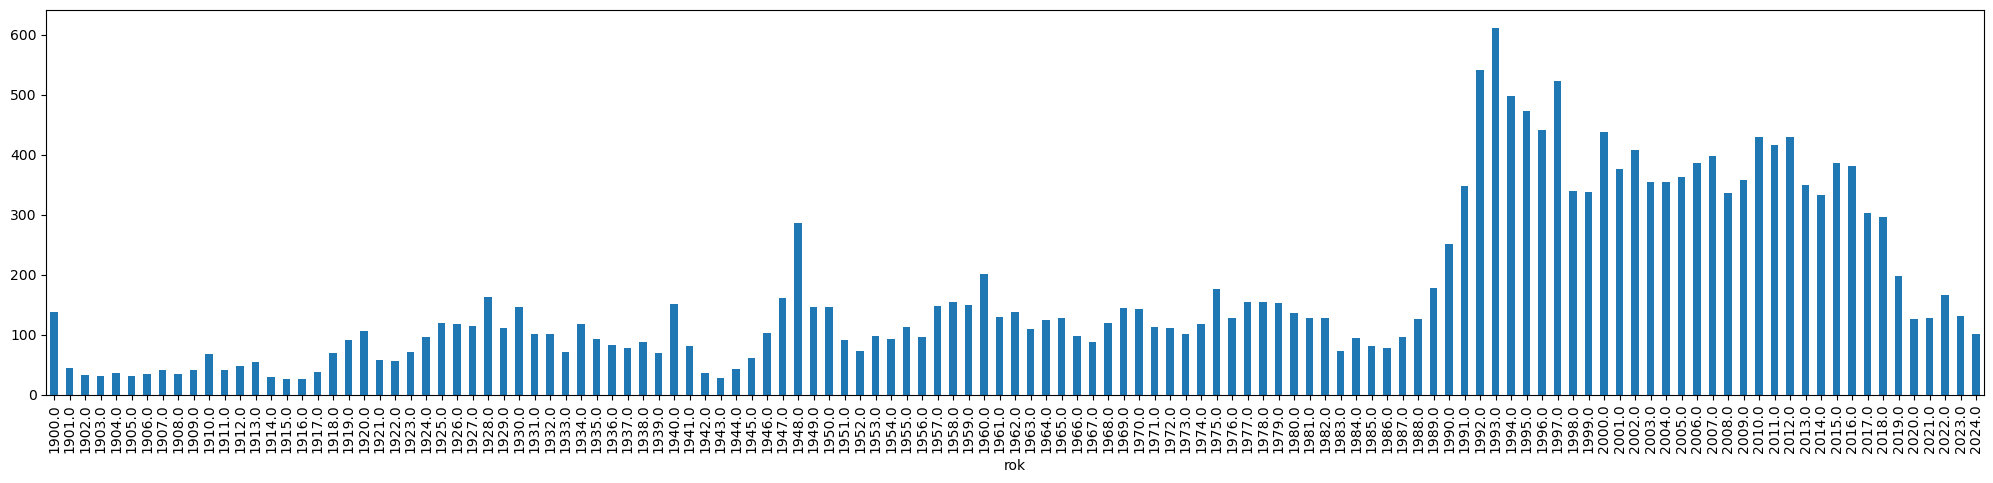

In [198]:
r(df[(df['008'].str[33] == '1') & (df['041_h'].isnull())][['100_a','245_a','rok']])

In [206]:
df[(df['008'].str[33] == '1') & (df['041_h'].isnull()) & (df['rok'].isin([i for i in range(1914,1924)]))][['100_a','245_a','rok']].sample(50)

,100_a,245_a,rok
001,,,
cpk19980302581,"[Lier, Jan,]",[Za okřídleným kolem :],1921.0
nos190131942,"[Němcová, Božena,]",[Dobrý člověk /],1920.0
np9541281,"[Němcová, Božena,]",[Babička :],1920.0
nos190107399002,"[Deml, Jakub,]",[Věštec /],1919.0
nkc20172926615,"[Ibing, A. J.]",[Po stopách věčné pravdy.],1916.0
cpk19970274875,"[Nováková, Teréza,]",[Jiří Šmatlán :],1918.0
nos190154650,"[Vratislav, František,]",[Divadelním vlakem do Prahy :],1915.0
bknmik04108,"[Bass, Eduard,]",[Látky - nebudou! /],1917.0
nos190146130,"[Strejček, Ferdinand,]",[Josef Svátek /],1923.0


In [196]:
df[(df['008'].str[33] == '1') & (df['041_h'].isnull())][['100_a','245_a','rok']].sample(50)

,100_a,245_a,rok
001,,,
cpk19960164379,"[Dusil, Viktor,]",[Jako by tudy nikdo nešel :],1996.0
bk195600013,None,[Rozlet 1955 :],1955.0
ck8300198,"[Smutný, Oldřich,]",[Labutě... labutě /],1982.0
bk198001146,"[Taufer, Jiří,]",[Indianie :],1979.0
nkc20182965468,"[Dušek, Jakub,]",[Hrdelní zločiny Tišnova a okolí /],2017.0
cpk20051498871,"[Krutil, Inocenc,]",[Z pamětí Inocence Krutila - podhostýnského ro...,2003.0
cpk19950115645,"[Bednářová, Marta,]","[Nemocnice, aneb, Bolnica /]",1995.0
bk196001493,"[Rais, Karel Václav,]",[Výminkáři /],1960.0
cpk20000965318,"[Longinová, Helena,]",[Sladká chuť hořkého medu /],2000.0


<Axes: xlabel='rok'>

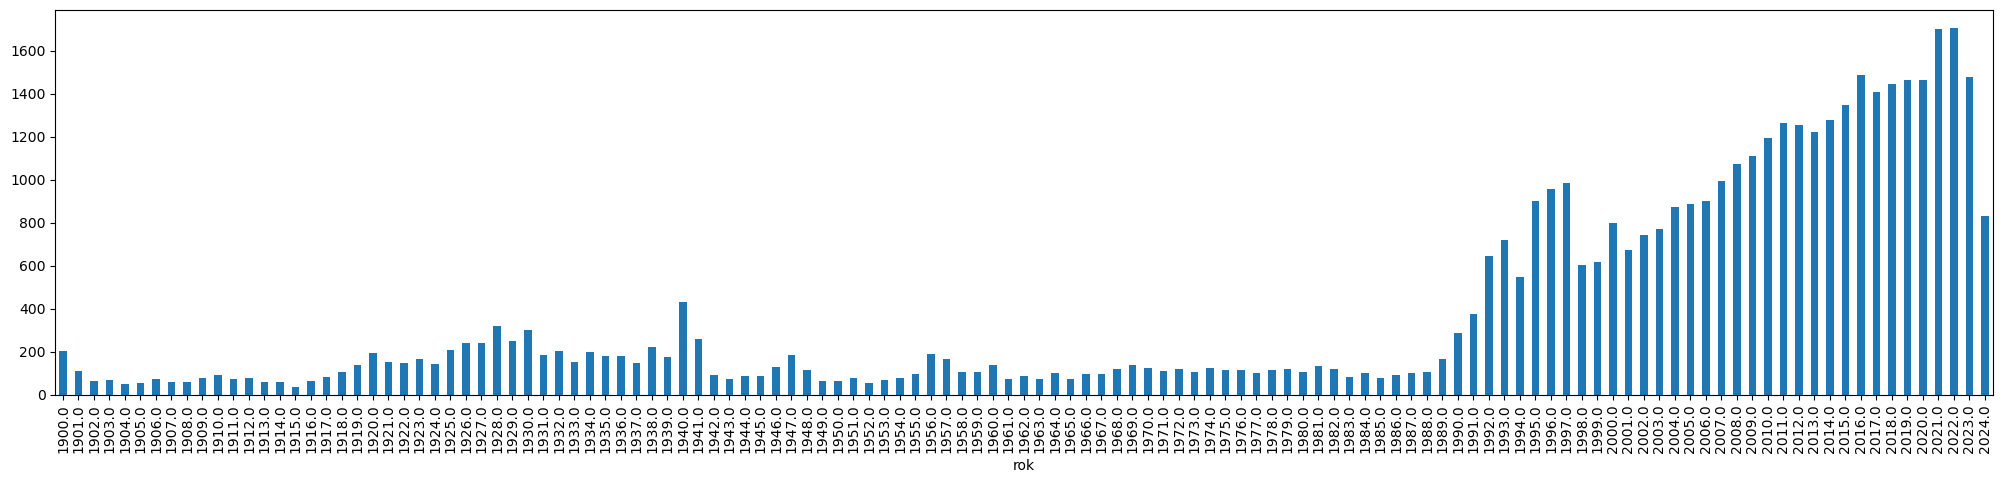

In [103]:
r(df[df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)])

<Axes: xlabel='rok'>

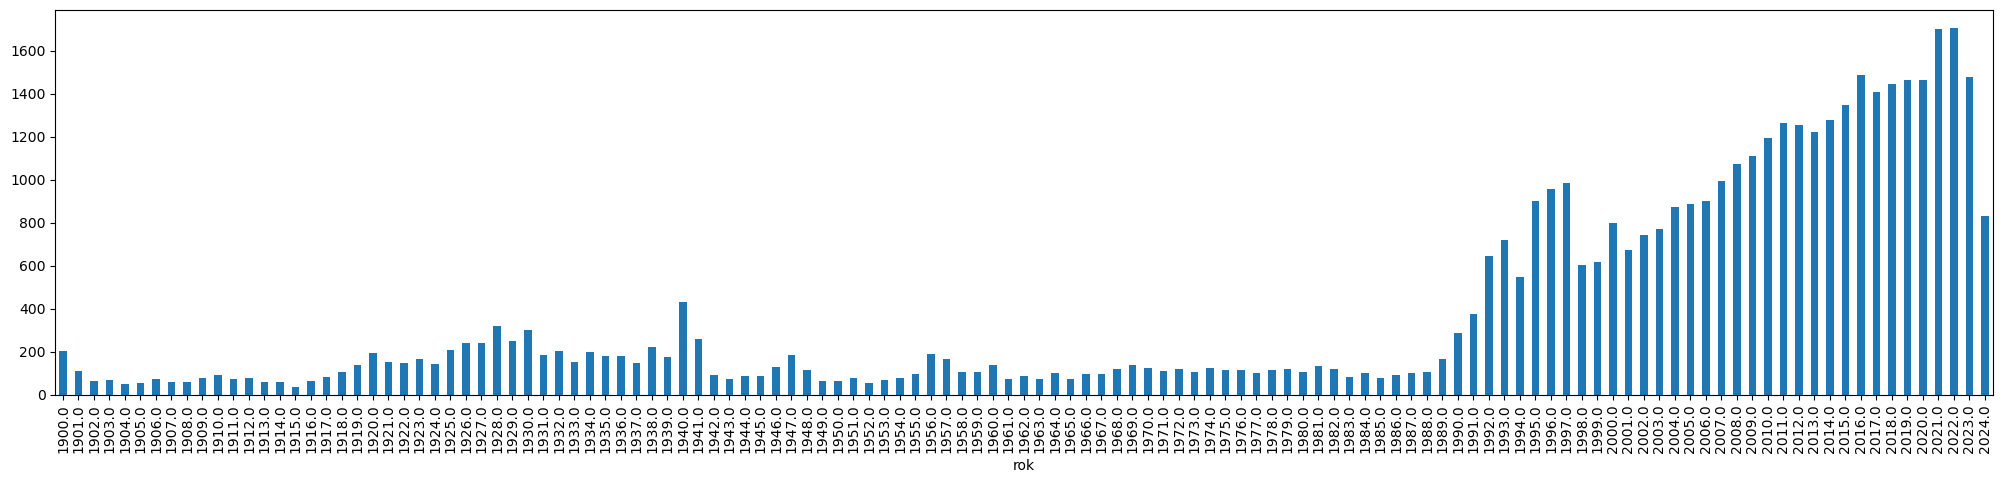

In [104]:
r(df[df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)])

<Axes: xlabel='rok'>

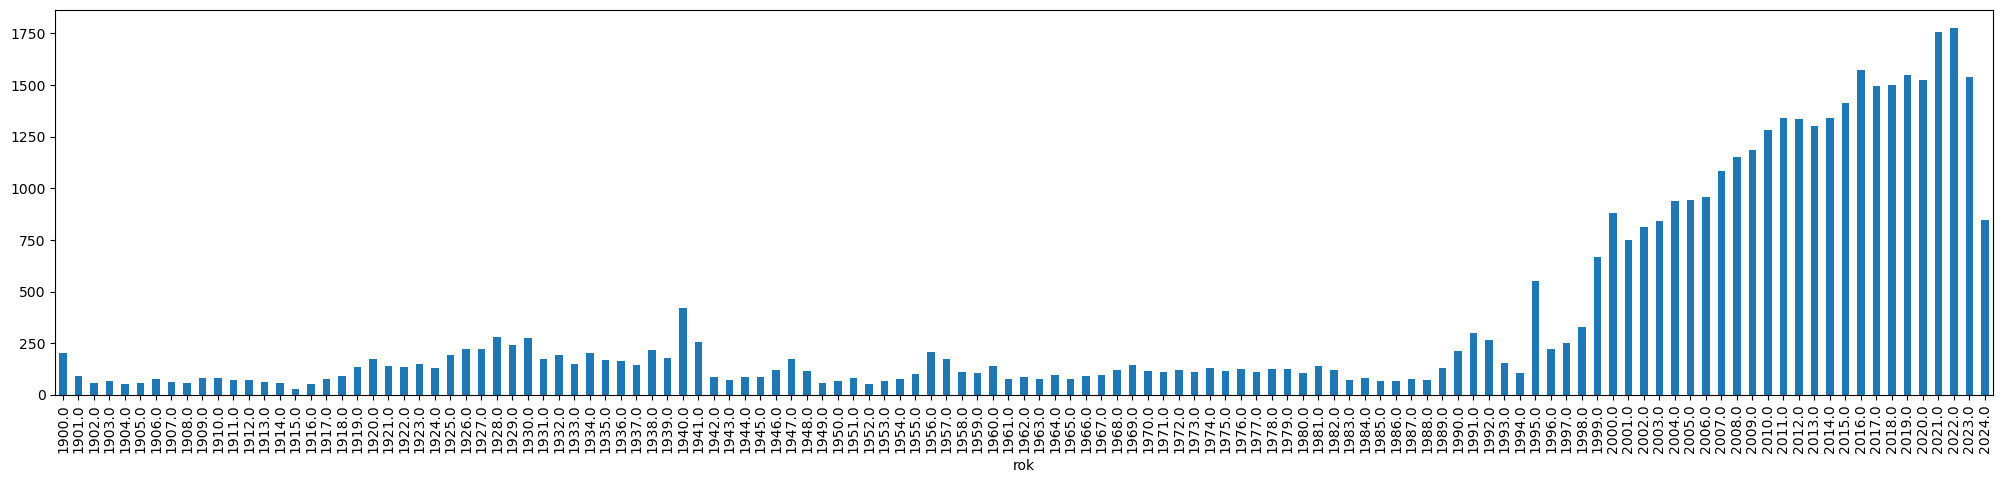

In [105]:
r(df[df['080_a'].astype(str).str.contains('821.162.3-3',na=False)])

C:\Users\micha\AppData\Local\Temp\ipykernel_28200\4186445667.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  r(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|novely|povídky)', na=False)])


<Axes: xlabel='rok'>

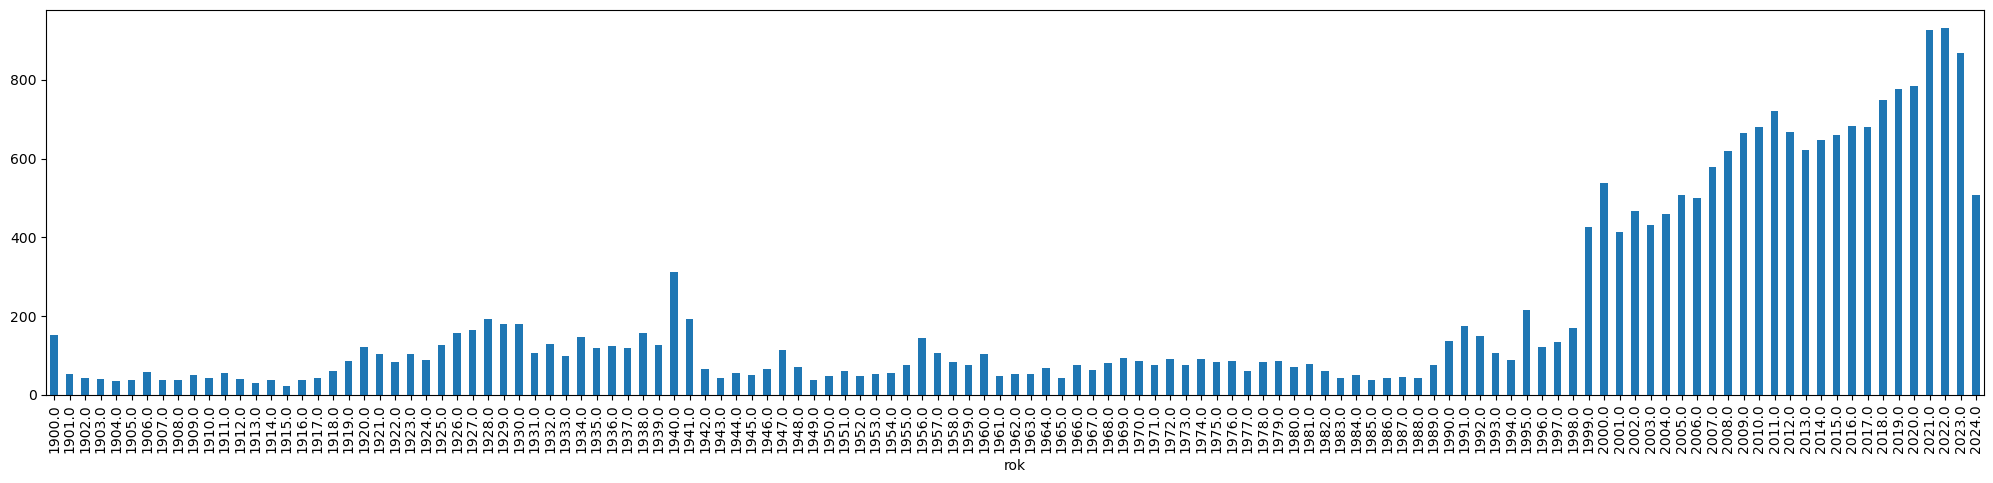

In [106]:
r(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|novely|povídky)', na=False)])

<Axes: xlabel='rok'>

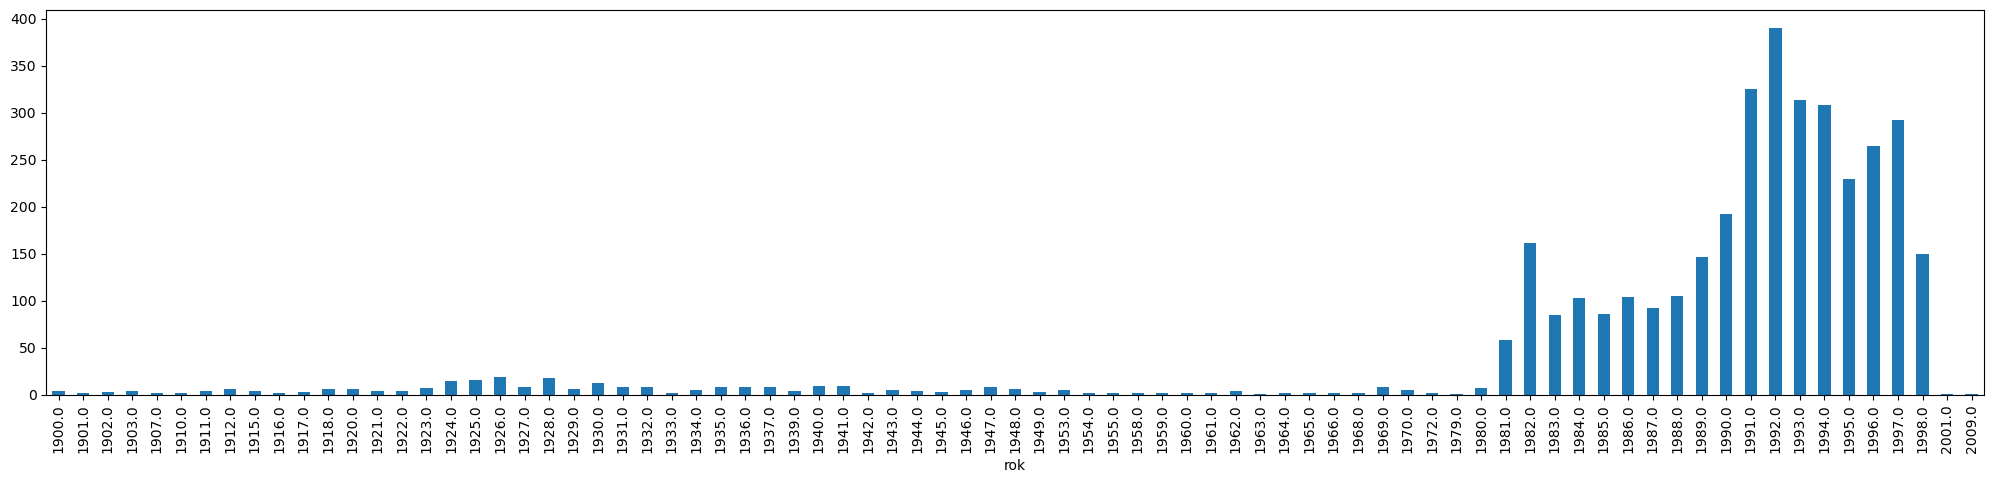

In [107]:
r(df[df['080_a'].astype(str).str.contains('885.0-31',na=False)])

<Axes: xlabel='rok'>

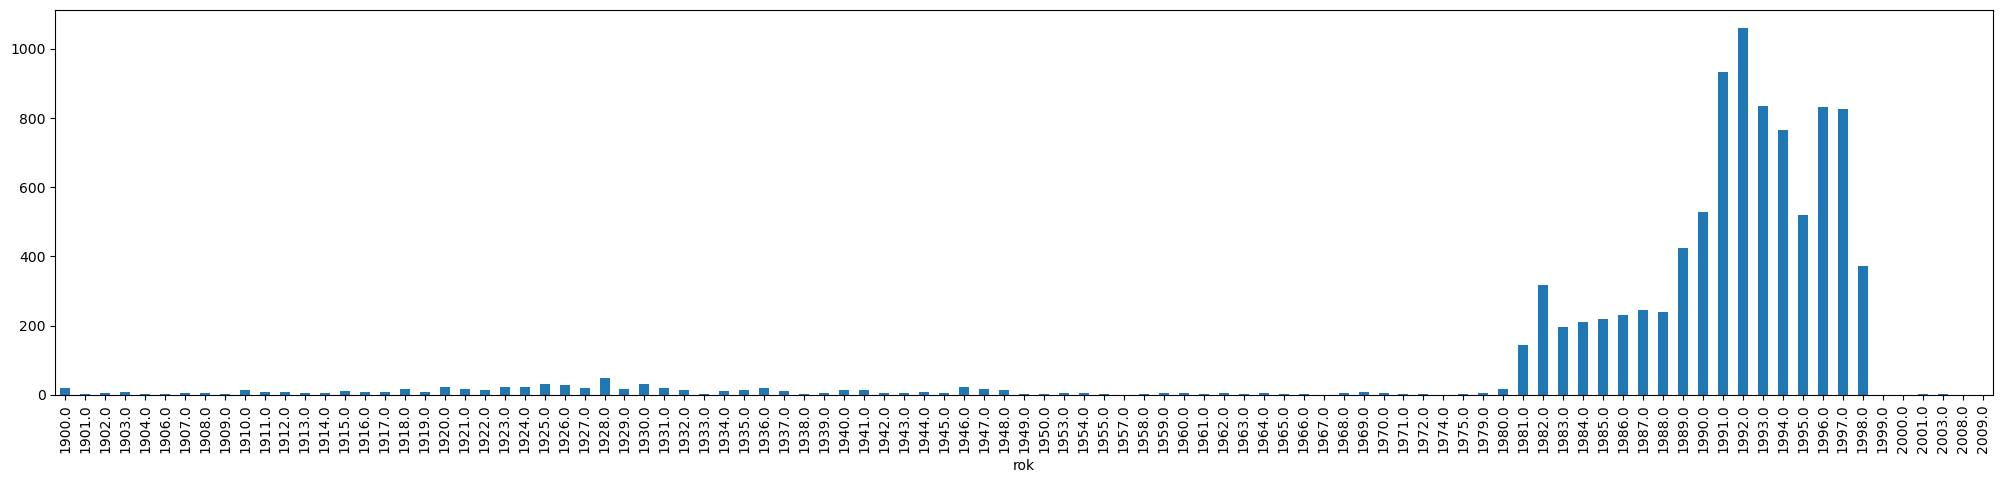

In [108]:
r(df[df['080_a'].astype(str).str.contains('885.0-3',na=False)])

<Axes: xlabel='rok'>

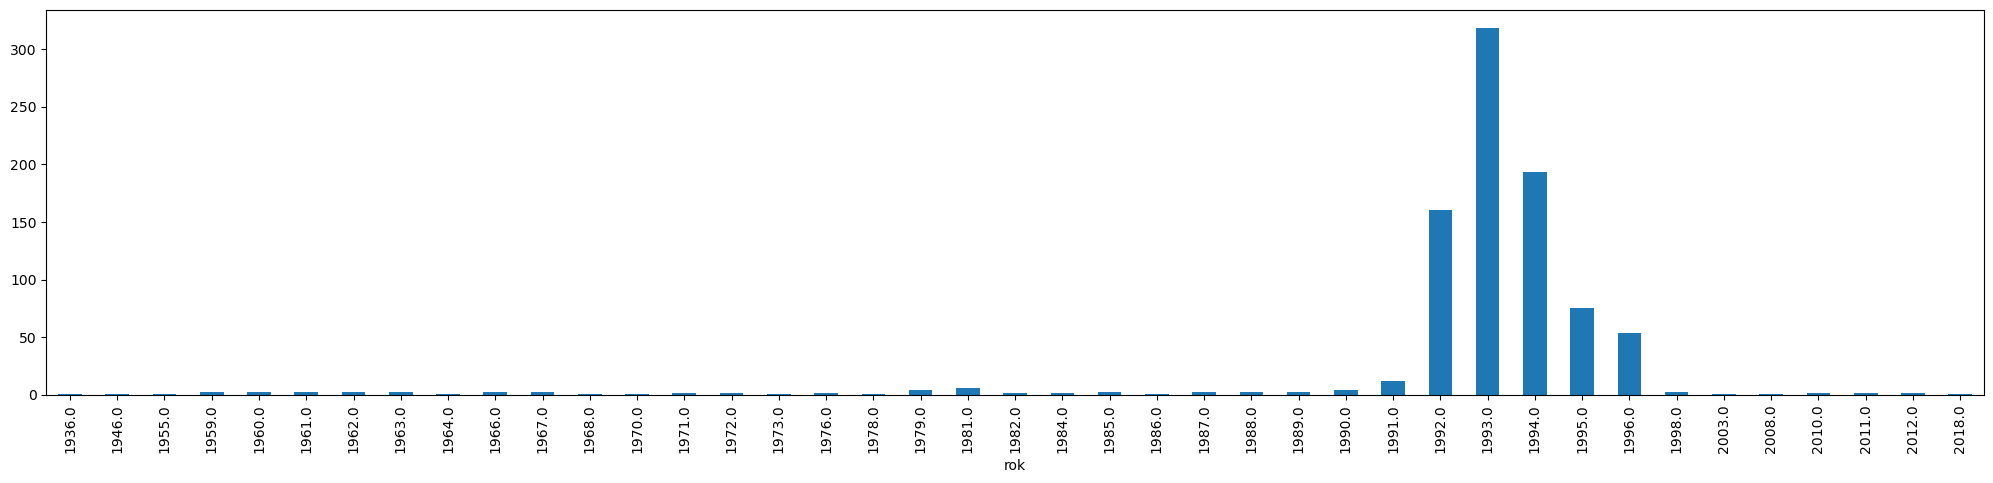

In [109]:
r(df[df['080_a'].astype(str).str.contains('885',na=False) & (df['080_a'].astype(str).str.contains('82-3',na=False))])

<Axes: xlabel='rok'>

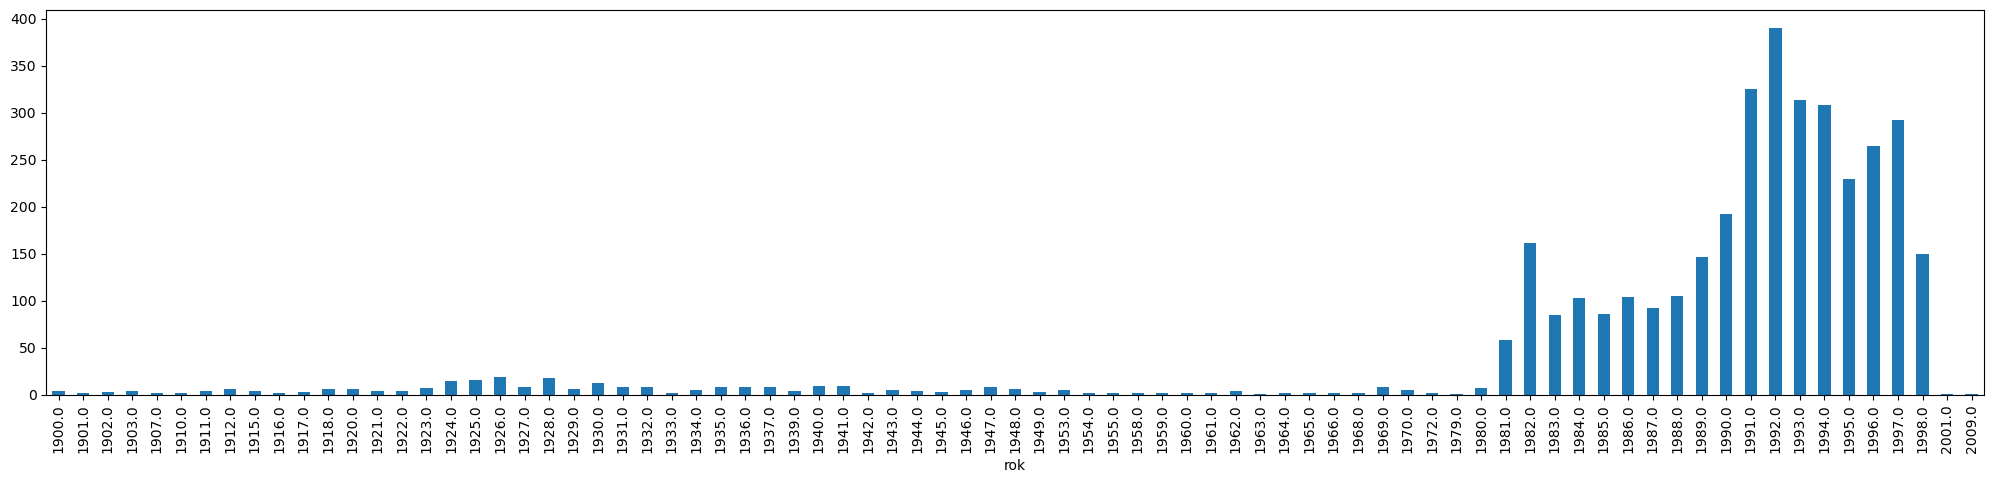

In [110]:
r(df[df['080_a'].astype(str).str.contains('885.0-31',na=False)])

In [111]:
df[df['080_a'].astype(str).str.contains('885.0-31',na=False)].sample(100)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19960167191,970514s1937 xr e 000 1acze,None,None,[(Váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[929, 885.0, 885.0-31]",[aut],[jk01073278],"[Malířová, Helena,]",[1877-1940],None,[Deset životů /],[Helena Malířová],None,None,None,None,None,[Praha :],"[Evropský literární klub,]",[1937],None,None,None,None,None,None,None,"[287 s., [3] s. ;]",None,[22 cm],None,None,[Životop. údaje],None,None,None,None,None,None,None,None,None,None,None,"[romány, autobiografie]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1937.0,Deset životů
np9534807,950323s1994 xr u0|0 1 cze,[80-202-0518-7],"[Kč 72,00]",[(váz.) :],None,None,None,None,[821.162.3-3],[Česká próza],"[885.0-31, 82-31/-32]",[aut],[jk01051344],"[Javořická, Vlasta,]",[1890-1979],None,[Šťastná hvězda /],[Vlasta Javořická],None,None,None,[V Čes. spis.ovateli 1. vyd.],None,[Praha :],"[Český spisovatel,]",[1994],[(Vimperk :],[Tiskárny Vimperk)],None,None,None,None,None,[267 s. ;],None,[21 cm],None,None,"[Vazba Pavel Hrach, Vl. jm. autorky je Marie Z...",None,None,None,None,None,None,None,None,None,None,None,[romány],[art],[jo20010086910],"[Hrach, Pavel,]",[1947-],None,None,None,None,None,None,None,nam a22 4500,1994.0,Šťastná hvězda
np9435029,950124s1994 xr 000 1 cze,[80-7116-804-1],"[Kč 79,00]",[(brož.) :],None,None,None,None,[821.162.3-3],[Česká próza],[885.0-31],[aut],[jk01033490],"[Hanuš, Miroslav,]",[1907-1995],None,[Konkláve /],[Miroslav Hanuš],None,None,None,[1. vyd.],None,[Praha :],"[Ivo Železný,]",[1994],None,None,None,None,None,None,None,[169 s. ;],None,[20 cm],"[Spisy Miroslava Hanuše, Česká knihovna]",None,None,None,None,None,None,None,None,None,None,None,None,[český próza],[romány],None,None,None,None,None,None,None,None,[Česká knihovna (Ivo Železný)],None,None,nam a22 4500,1994.0,Konkláve
cpk20081800275,080414s1940 xr g 000 0 cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[885.0-31],[aut],[jk01080431],"[Mařánek, Jiří,]",[1891-1959],None,[Romance o Závišovi /],[Jiří Mařánek],None,None,None,None,None,[V Praze :],"[Družstevní práce,]",[1940],[(v Rokycanech :],[Jos. B. Zápotočný)],None,None,None,None,None,[296 ;],None,[19 cm],[Živé knihy. A ;],[sv. 173],"[Úprava a vazba: Ladislav Sutnar, Obálka: Aloi...",None,None,None,None,None,[šlechtici],None,[13. století],[Česko],None,None,"[české romány, historické romány]",None,None,None,None,None,None,None,None,[Živé knihy (Družstevní práce).],None,None,nam a22 a 4500,1940.0,Romance o Závišovi
ck8300425,830406s1982 xr ac 000 1 cze,None,"[Kčs 30,00]",[(Brož.) :],None,None,None,None,[821.162.3-3],[Česká próza],"[885.0-31, 929Vinci,L.da]",[aut],[jk01051684],"[Jílek, František,]",[1924 březen 15.-],None,[Muž z Vinci /],[František Jílek],None,None,None,[Vyd. 1.],None,[Praha :],"[Československý spisovatel,]",[1982],None,[(TZ 3)],None,None,None,None,None,[445 s. :],"[il., portréty ;]",[21 cm],[Spirála],None,"[Chronologický přehled, Životopisná data, 4300...",None,None,None,None,None,None,None,None,None,None,None,[romány],None,None,None,None,None,None,None,None,[Spirála (Československý spisovatel)],None,"[Vinci, Leonardo da (malíř a sochař ital., 145...",nam a22 a 4500,1982.0,Muž z Vinci
ck8901675,890322s1988 xr a u0|0 cze,None,[35 Kčs],[(Váz.) :],None,None,None,None,None,None,"[885.0-31, 885.0-93]",[aut],[jk01121138],"[Steklač, Vojtěch,]",[1945-2021],None,[Pekelná třída :],[Vojtěch Steklač ; il. Adolf Born ; graf. úpra...,None,None,None,"[2., přeprac. vyd. (v Albatrosu 1. vyd.)]",None,[Praha :],"[Albatros,]",[1988],[(Liberec :],[SG)],

In [112]:
df[df['080_a'].astype(str).str.contains('885',na=False) & (df['080_a'].astype(str).str.contains('82-3',na=False))]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk195600068,980828s1955 xr ||| 1 cze,None,None,None,None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[885-93-96:[629.113+796.71/.72, 821-93, 821.16...",[aut],[jk01012955],"[Branald, Adolf,]",[1910-2008],None,[Dědeček automobil /],[Adolf Branald ; il. Kamil Lhoták],None,None,None,[1. vyd.],None,[Praha :],"[Československý spisovatel,]",[1955],[([Brno] :],[Brněn. knihtisk.])],None,None,None,None,None,"[256, [3] s. ;]",None,[8°],None,None,"[20000 výt., S barev. il. v textu a na předsád...",[Kniha je věnována historii začátků českého au...,None,None,None,None,None,None,None,None,None,None,"[české romány, publikace pro mládež, Czech fic...",[ill],[jk01072017],"[Lhoták, Kamil,]",[1912-1990],None,None,None,None,None,None,"[Automobily - začátky - kresby a reportáže, Zá...",nam a22 1 4500,1955.0,Dědeček automobil
bk195901353,980312s1959 xr 0|0 0 cze,None,None,None,None,None,None,None,[821.162.3-2],[České drama],"[821.162.3-2, (0:82-2), (0:82-34), 885-93-252.5]",[aut],[jk01010423],"[Augusta, Oldřich,]",[1924-1997],None,[O chaloupce z marcipánu :],[Oldřich Augusta ; dramaturgické a režijní poz...,None,None,None,[1. vyd.],None,[Praha :],"[Orbis,]",[1959],None,[(KNT 1)],None,None,None,None,None,"[72, [2] s. ;]",None,[8°],[Hry pro loutky ;],[Sv. 39],[3000 výt.],"[Volně zpracovaný pohádkový námět, který jasně...",None,None,None,None,None,None,None,None,None,"[česká dramata, divadelní hry, pohádky]","[česká dramata, pohádky, Czech drama, fairy ta...","[ill, aui]","[jk01040391, jk01033228]","[Havlík, Václav,, Halík, Jindřich,]","[1921-1996, 1933-1989]",None,None,None,None,[Hry pro loutky (Orbis)],None,[Pohádky - hry loutkové],nam a22 1 4500,1959.0,O chaloupce z marcipánu
bk195901353,980312s1959 xr 0|0 0 cze,None,None,None,None,None,None,None,[821.162.3-2],[České drama],"[821.162.3-2, (0:82-2), (0:82-34), 885-93-252.5]",[aut],[jk01010423],"[Augusta, Oldřich,]",[1924-1997],None,[O chaloupce z marcipánu :],[Oldřich Augusta ; dramaturgické a režijní poz...,None,None,None,[1. vyd.],None,[Praha :],"[Orbis,]",[1959],None,[(KNT 1)],None,None,None,None,None,"[72, [2] s. ;]",None,[8°],[Hry pro loutky ;],[Sv. 39],[3000 výt.],"[Volně zpracovaný pohádkový námět, který jasně...",None,None,None,None,None,None,None,None,None,"[česká dramata, divadelní hry, pohádky]","[česká dramata, pohádky, Czech drama, fairy ta...","[ill, aui]","[jk01040391, jk01033228]","[Havlík, Václav,, Halík, Jindřich,]","[1921-1996, 1933-1989]",None,None,None,None,[Hry pro loutky (Orbis)],None,[Pohádky - hry loutkové],nam a22 1 4500,1959.0,O chaloupce z marcipánu
bk195903642,980522s1959 xr cze,None,None,None,[cze],[rus],[1],None,None,None,[885-93-252.5:882-34],[adp],[jk01012652],"[Borisová, Eva]",None,None,[Tajemství zlatého klíčku :],[[Námět] A. Tolstého zdramatisovala E. Borisov...,None,None,None,[1. vyd.],None,[Praha :],"[Orbis,]",[1959],None,[(KNT 2)],None,None,None,None,None,"[81, [3] s. ;]",None,[8°],[Hry pro loutky ;],[Sv. 46],[2000 výt.],"[Hra, v níž vystupují loutky i živí herci, zná...",None,None,None,None,None,None,None,None,None,None,None,[ant],[jn19990210621],"[Tolstoj, Aleksej Nikolajevič,]",[1882-1945],None,None,None,None,[Hry pro loutky],None,[Hry loutkové],nam a22 1 4500,1959.0,Tajemství zlatého klíčku
bk196001340,980527s1960 xr cze,None,None,None,[cze],[rus],[1],None,None,None,[885-21:882-32],[aut],[jn20000601764],"[Gercen, Aleksandr Ivanovič,]",[1812-1870],None,[Kdo je vinen? :],[napsal A.J. Gercen ; zdramatisovala Zuzana Ko...,None,None,None,None,None,[Praha :],"

In [262]:
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: ", ".join([y.replace(',','') for y in x]) if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7'].apply(lambda x: x[0] if x != None else None)
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

C:\Users\micha\AppData\Local\Temp\ipykernel_28200\1202386092.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


In [253]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20122431855,2012.0,Hubený nás nedostan,Skolek Richard,jo2008479046
nkc20162857827,2016.0,Lili a dvě mámy,Geislerová Lela,xx0001534
nkc20132518974,2013.0,Studánková víla,Melicharová Alena,mzk2003200040
nkc20122405666,2012.0,Hledět stále jedním směrem,Ettler Petr,kpwa5496
cpk20223473177,1942.0,Sychrova éra,Laichter Josef,jk01071402
cpk19960166489,1996.0,Severin,Bondy Egon,jk01012610
nkc20051636105,2005.0,Miluji tě 3x denně,Kousalová Hanka,jn20020126024
bknmik11009,1927.0,Červený kohout,Šťastný Bohumil,jk01131109
nkc20223417123,2022.0,Domov není jen místo,Geltnerová Jana,xx0267599


<Axes: xlabel='rok'>

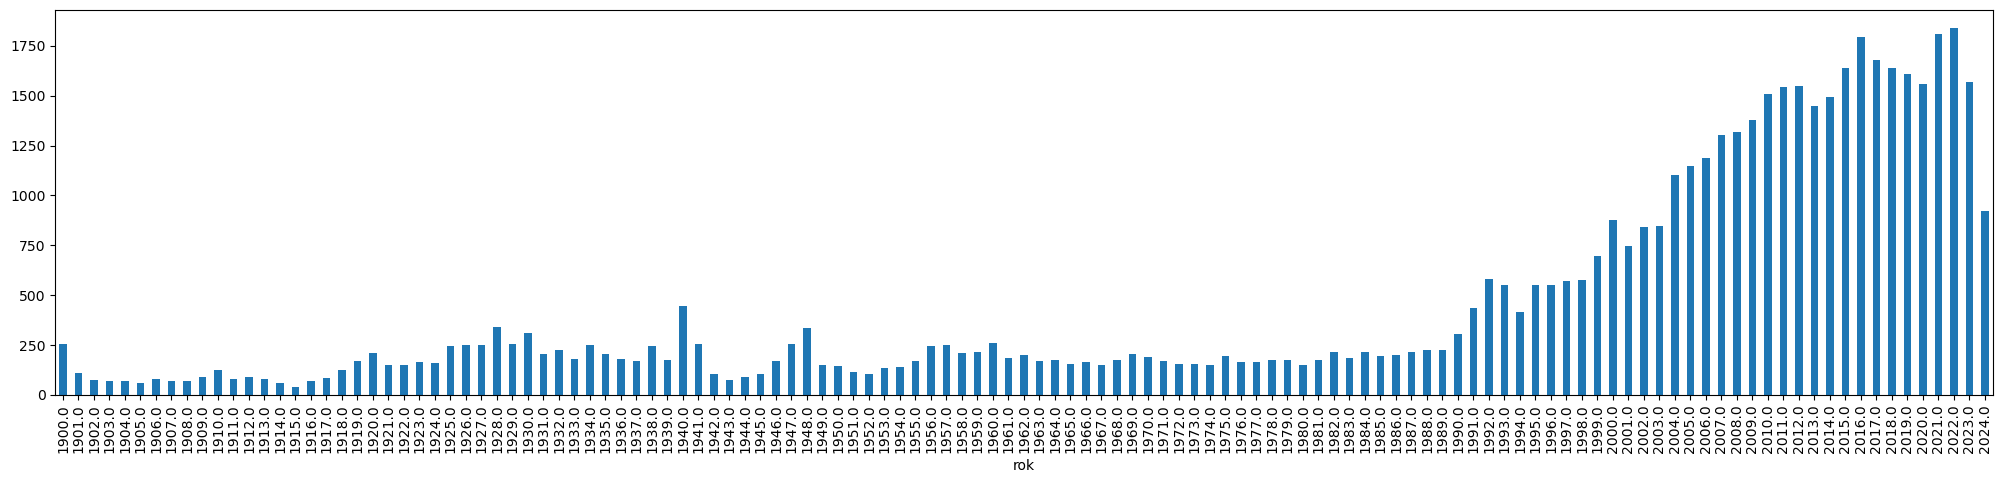

In [254]:
r(ceska_proza2)

In [255]:
len(ceska_proza2)

55076